In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import japanize_matplotlib # 追加

In [3]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0107bunpu.csv"
df = pd.read_csv(csv_file_path)
print(df)

                    optimize_name                       data_name  qubit  \
0    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1000      4   
1    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1001      4   
2    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1002      4   
3    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1000      4   
4    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1001      4   
..                            ...                             ...    ...   
331  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1001     16   
332  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1002     16   
333  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1000     16   
334  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1001     16   
335  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1002     16   

     input_gates   p_t  seed  gates_aft  one-qubit_gates  two-qubit_gates  \
0         

KeyError: "Columns not found: '101'"

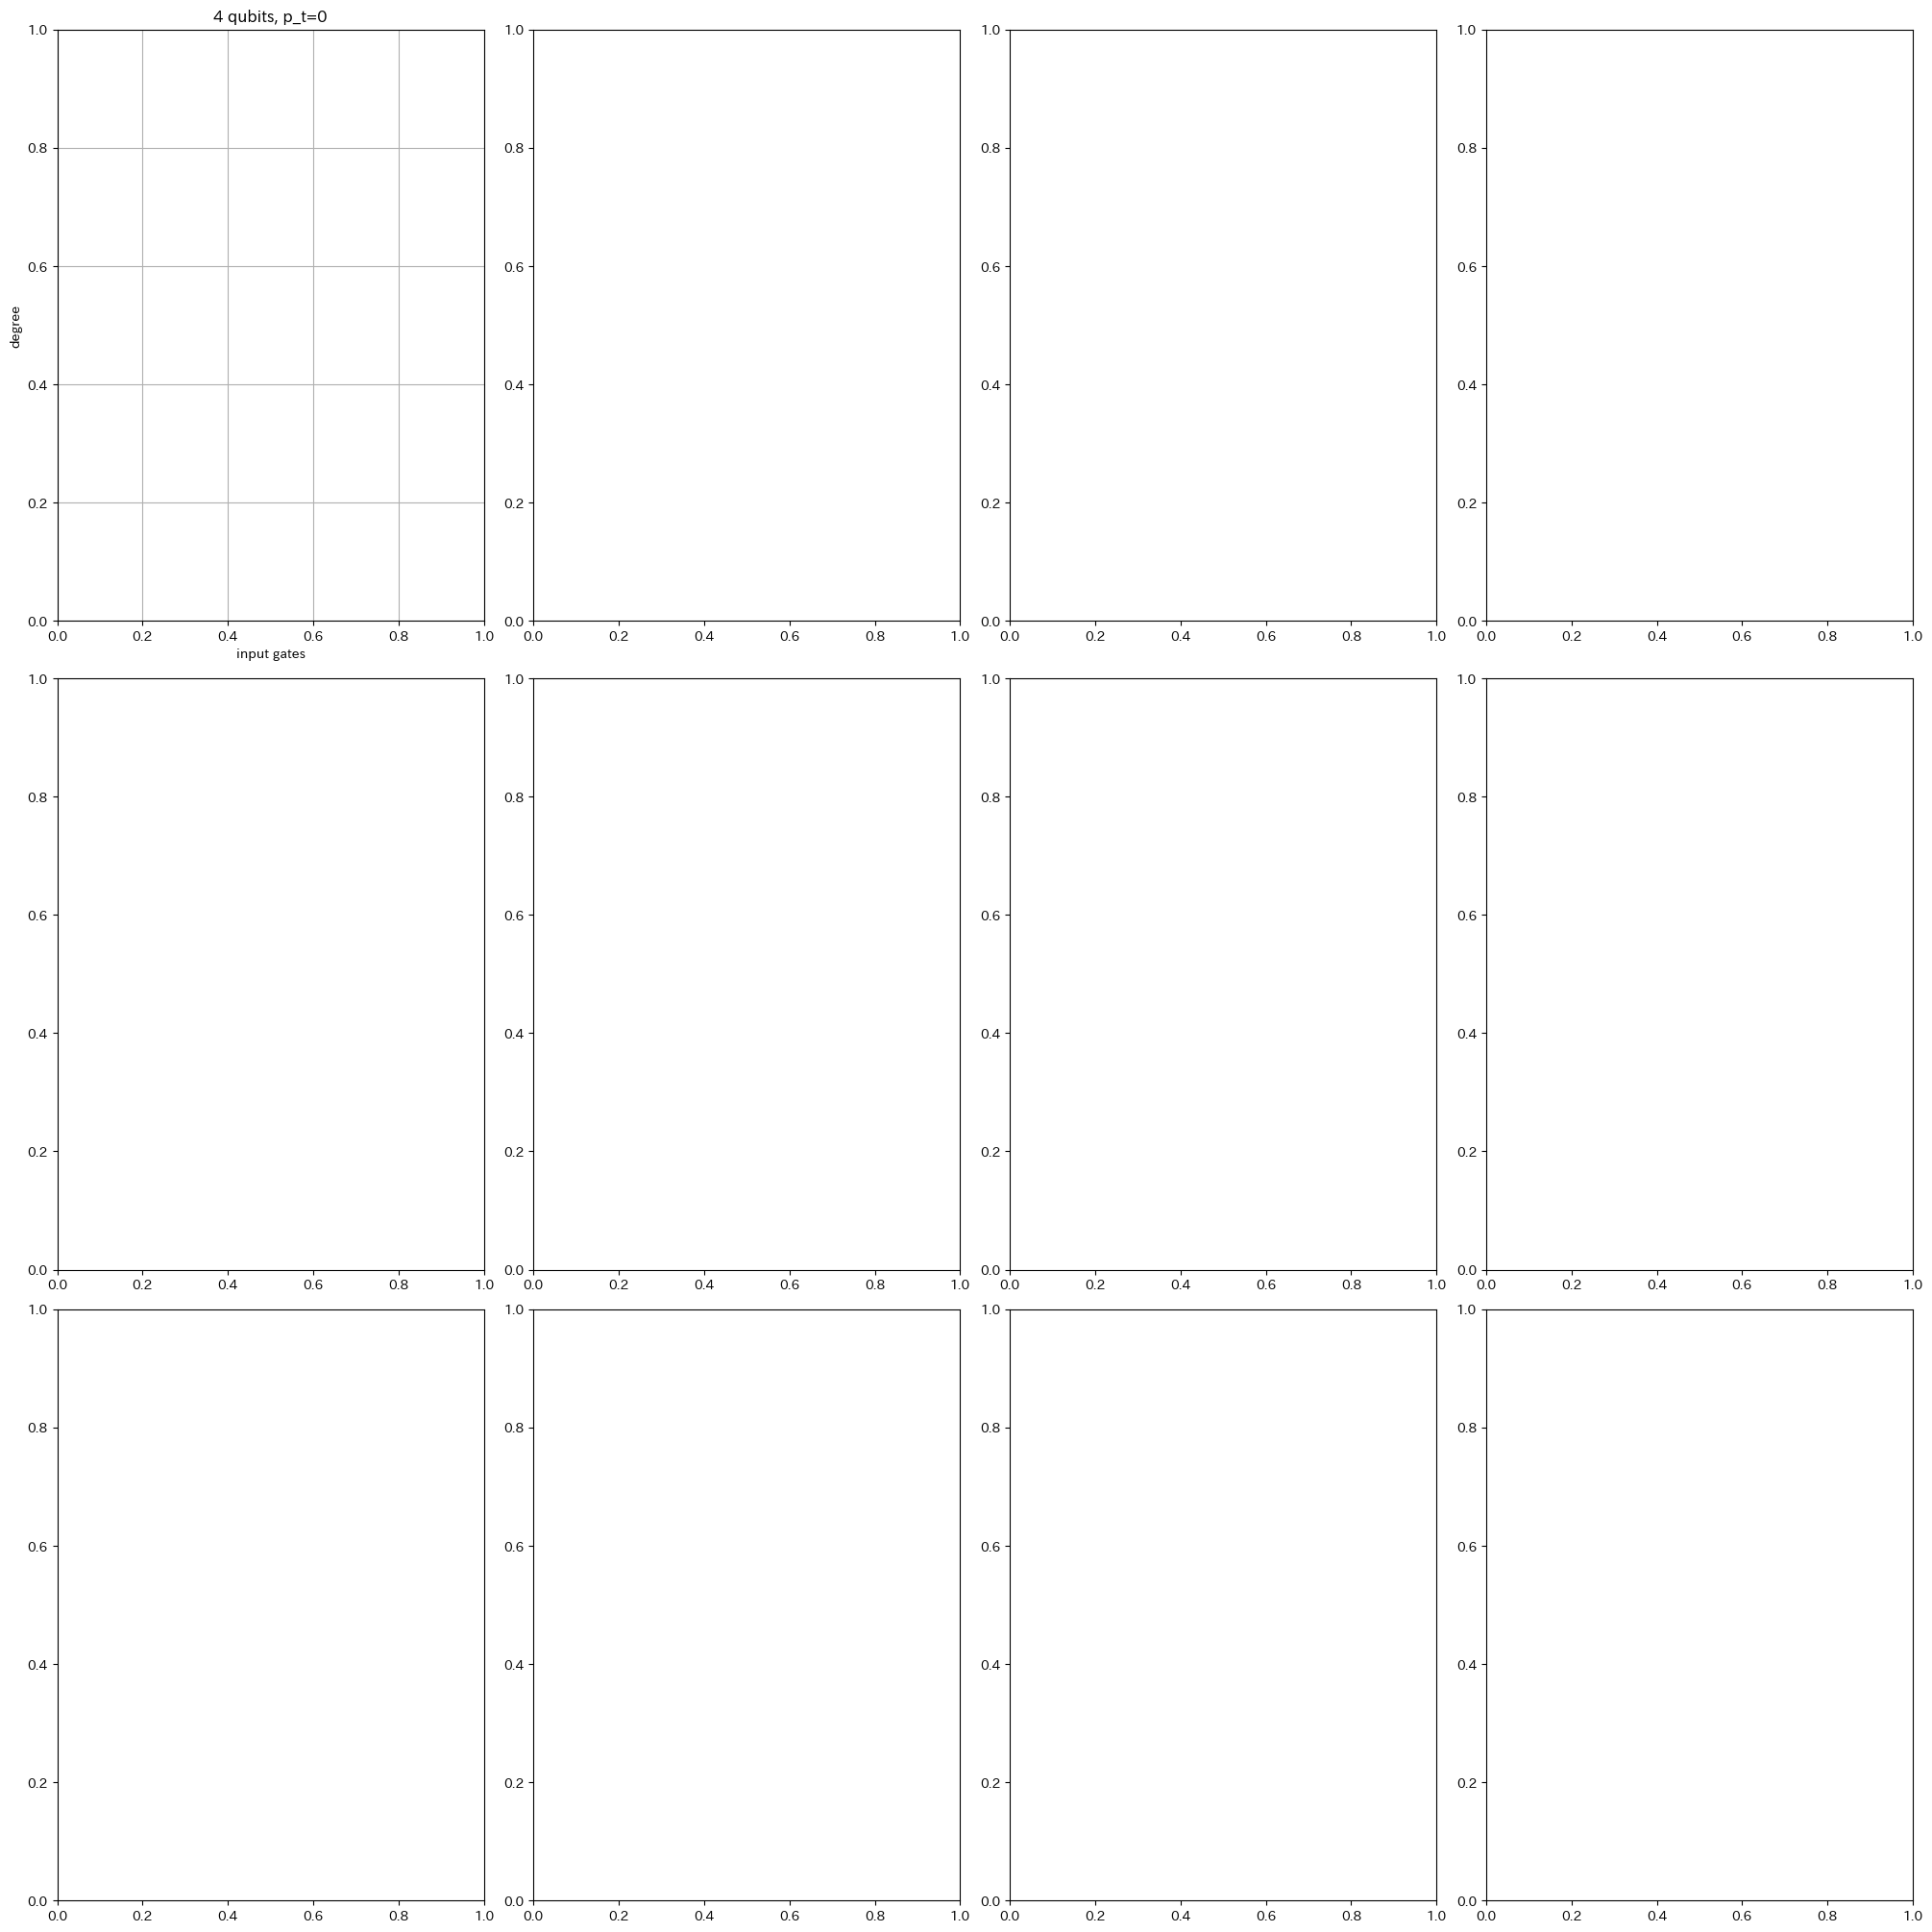

In [4]:

qubits = [4,8,16]
gates = [500,1000,5000,10000]
p_t_lists = [0,0.12,0.20,0.40]
plot_columns = [str(i) for i in range(0, 101, 5)]
plot_columns.append("101")
#fig,axes = plt.subplots(7,11)

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(20, 20),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            #print(qubit,p_t)
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}")
            ax[qubit][p_t].set_xlabel("input gates")
            ax[qubit][p_t].set_ylabel("degree")
            #ax[qubit][p_t].set_xlim(0, 11000)
            #ax[qubit][p_t].set_xticks(np.arange(0, 10001, 1000))
            ax[qubit][p_t].grid(True)

            data = df[(df["p_t"] == p_t_lists[p_t]) & (df["qubit"] == qubits[qubit]) & (df["input_gates"] == 10000)]
            #print(data)
            df_avg = data.groupby("optimize_name")[plot_columns].mean()
            #print(df_avg.iloc[0].values)

            numeric_data = df_avg.iloc[0].values.tolist()
            #print(numeric_data)

            ax[qubit][p_t].bar(plot_columns, numeric_data, label=f"p_t={p_t}",alpha=0.7)
            ax[qubit][p_t].legend()

plt.show()



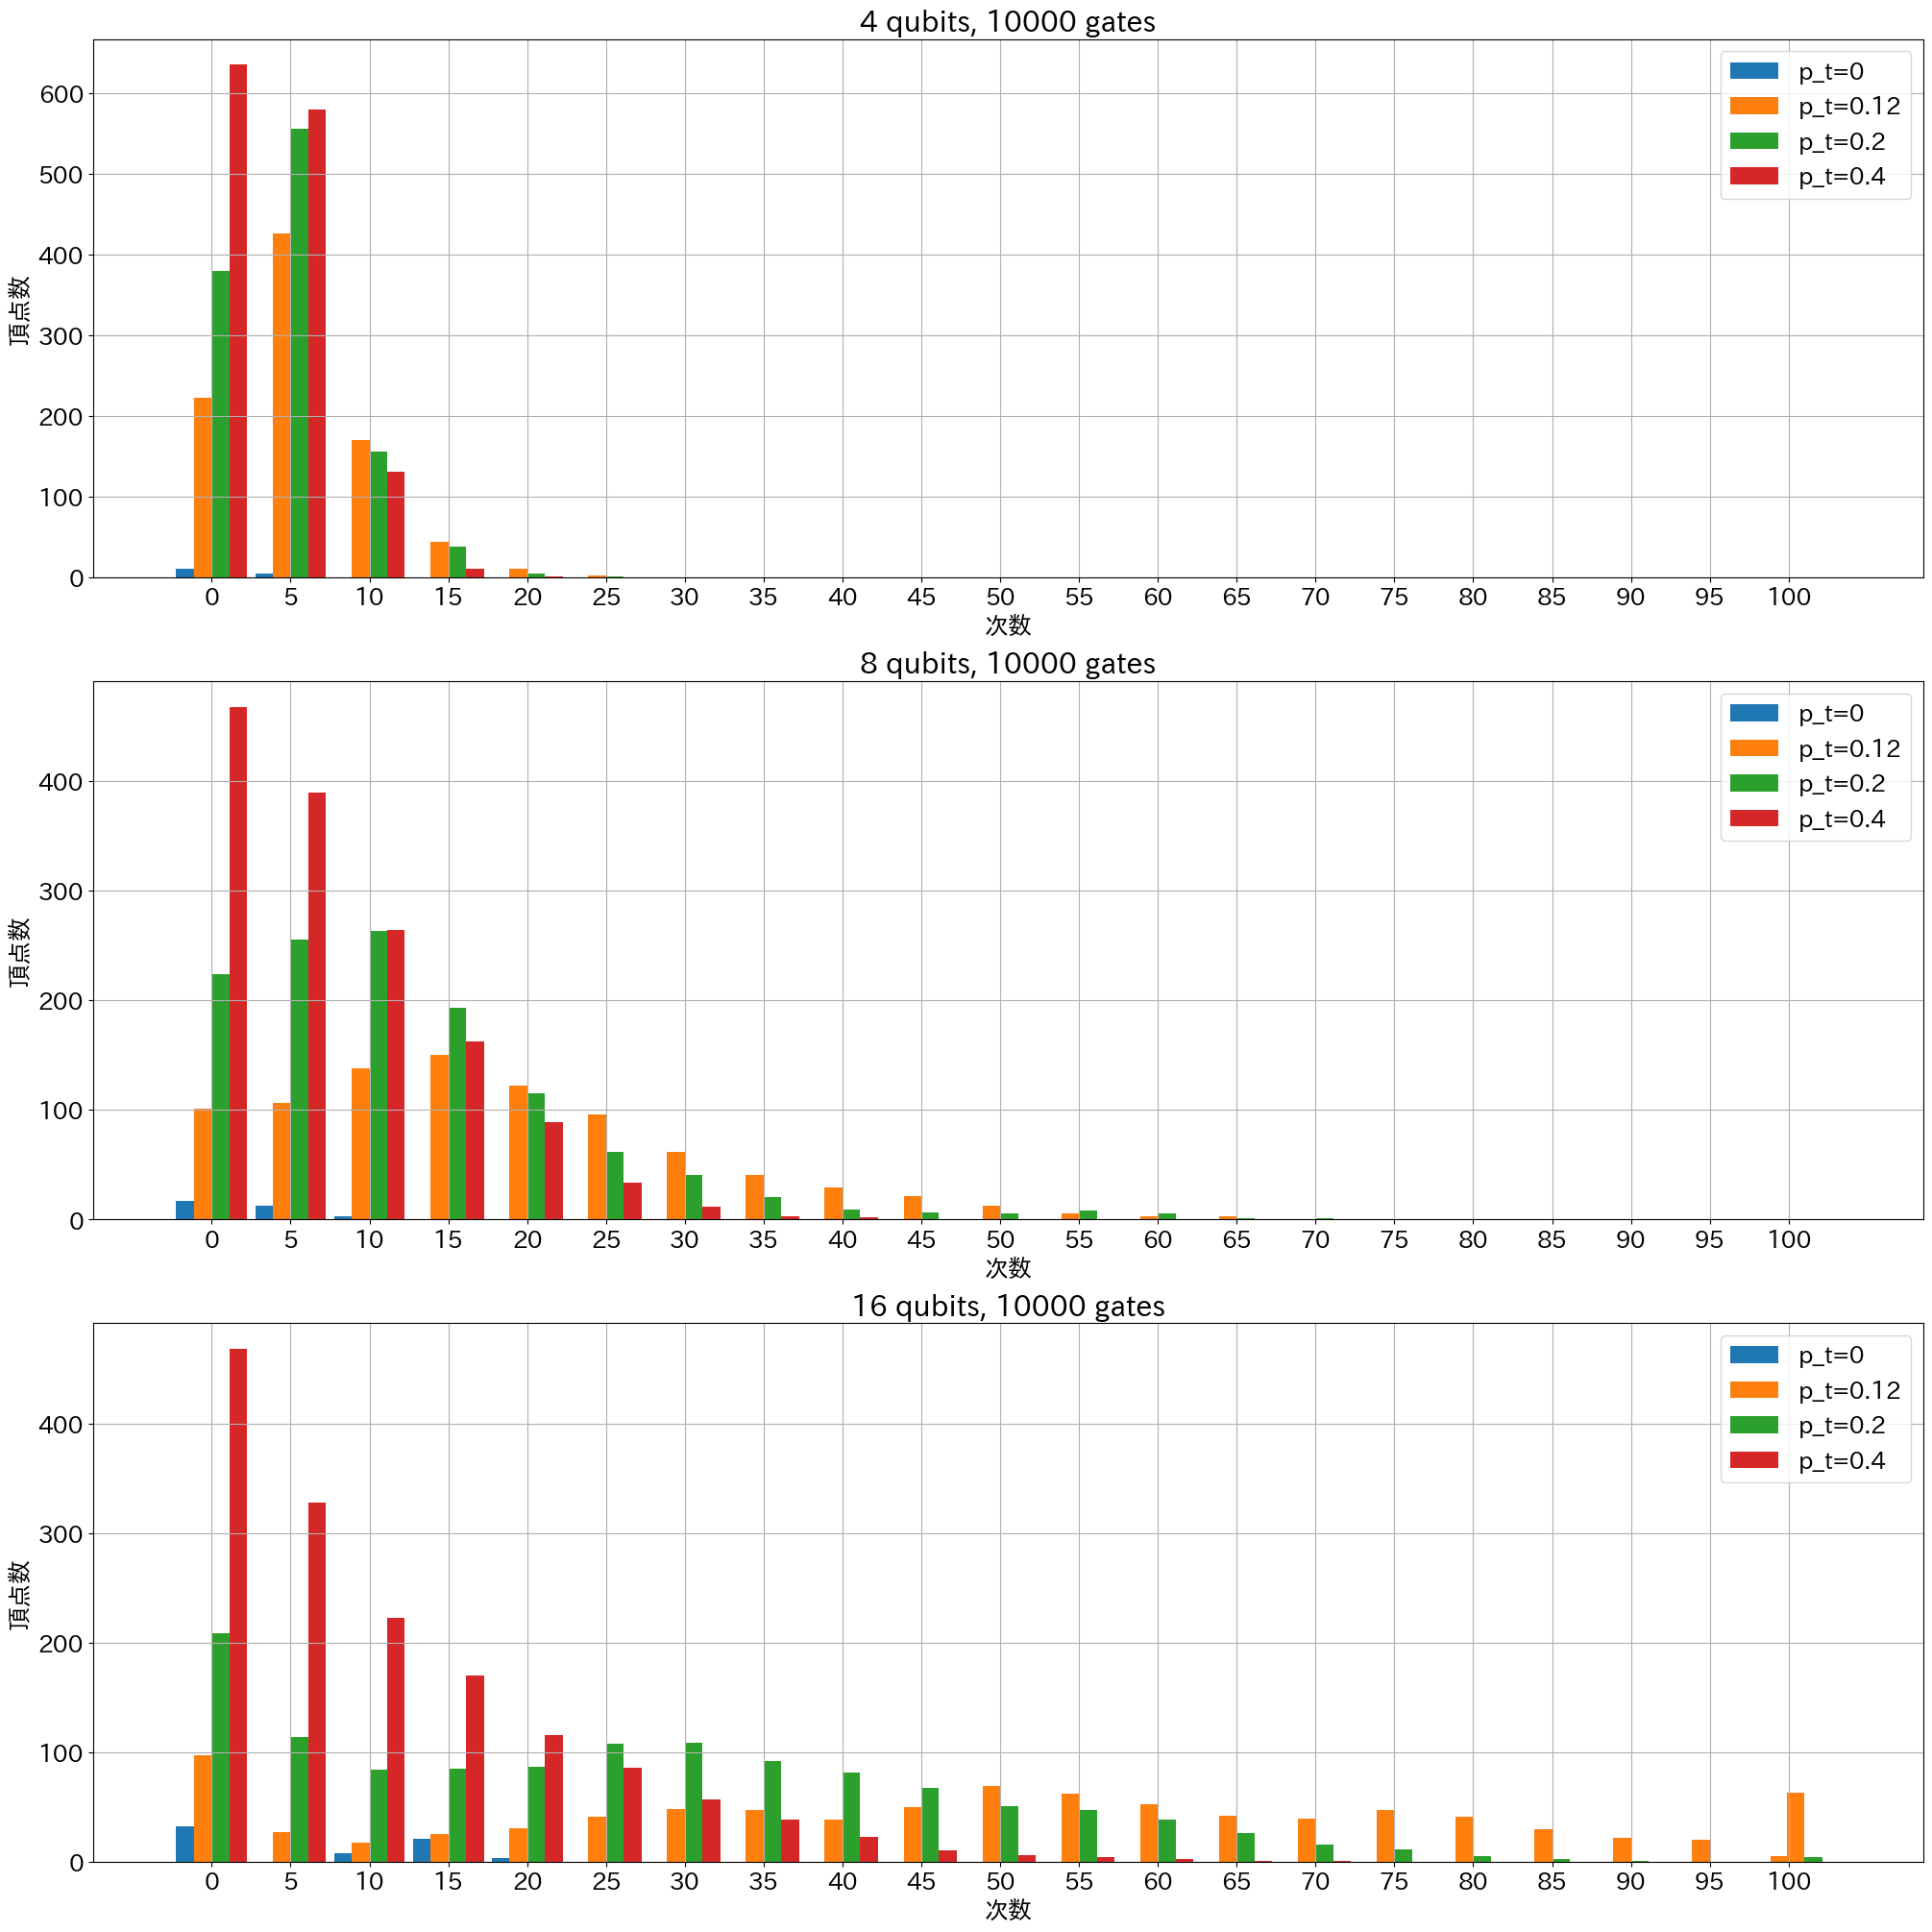

In [94]:
qubits = [4, 8, 16]
gates = [500, 1000, 5000, 10000]
p_t_lists = [0, 0.12, 0.20, 0.40]
plot_columns = [str(i) for i in range(0, 101, 5)]
plot_columns.append("101")

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("頂点数")
    ax[qubit].set_xticks(np.arange(0, 101, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df[(df["p_t"] == p_t_lists[p_t]) & 
                  (df["qubit"] == qubits[qubit]) & 
                  (df["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns].mean()
        numeric_data = df_avg.iloc[0].values.tolist()

        # x軸の位置を調整
        x = [i for i in range(0, 101, 5)]
        x.append(101)
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

In [128]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0107bunpu_2.csv"
df2 = pd.read_csv(csv_file_path)
print(df2)

                    optimize_name                       data_name  qubit  \
0    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1000      4   
1    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1001      4   
2    clifford_simp_not_post_basic       q4_gates500_pt0_seeds1002      4   
3    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1000      4   
4    clifford_simp_not_post_basic    q4_gates500_pt0.04_seeds1001      4   
..                            ...                             ...    ...   
331  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1001     16   
332  clifford_simp_not_post_basic  q16_gates10000_pt0.2_seeds1002     16   
333  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1000     16   
334  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1001     16   
335  clifford_simp_not_post_basic  q16_gates10000_pt0.4_seeds1002     16   

     input_gates   p_t  seed  gates_aft  one-qubit_gates  two-qubit_gates  \
0         

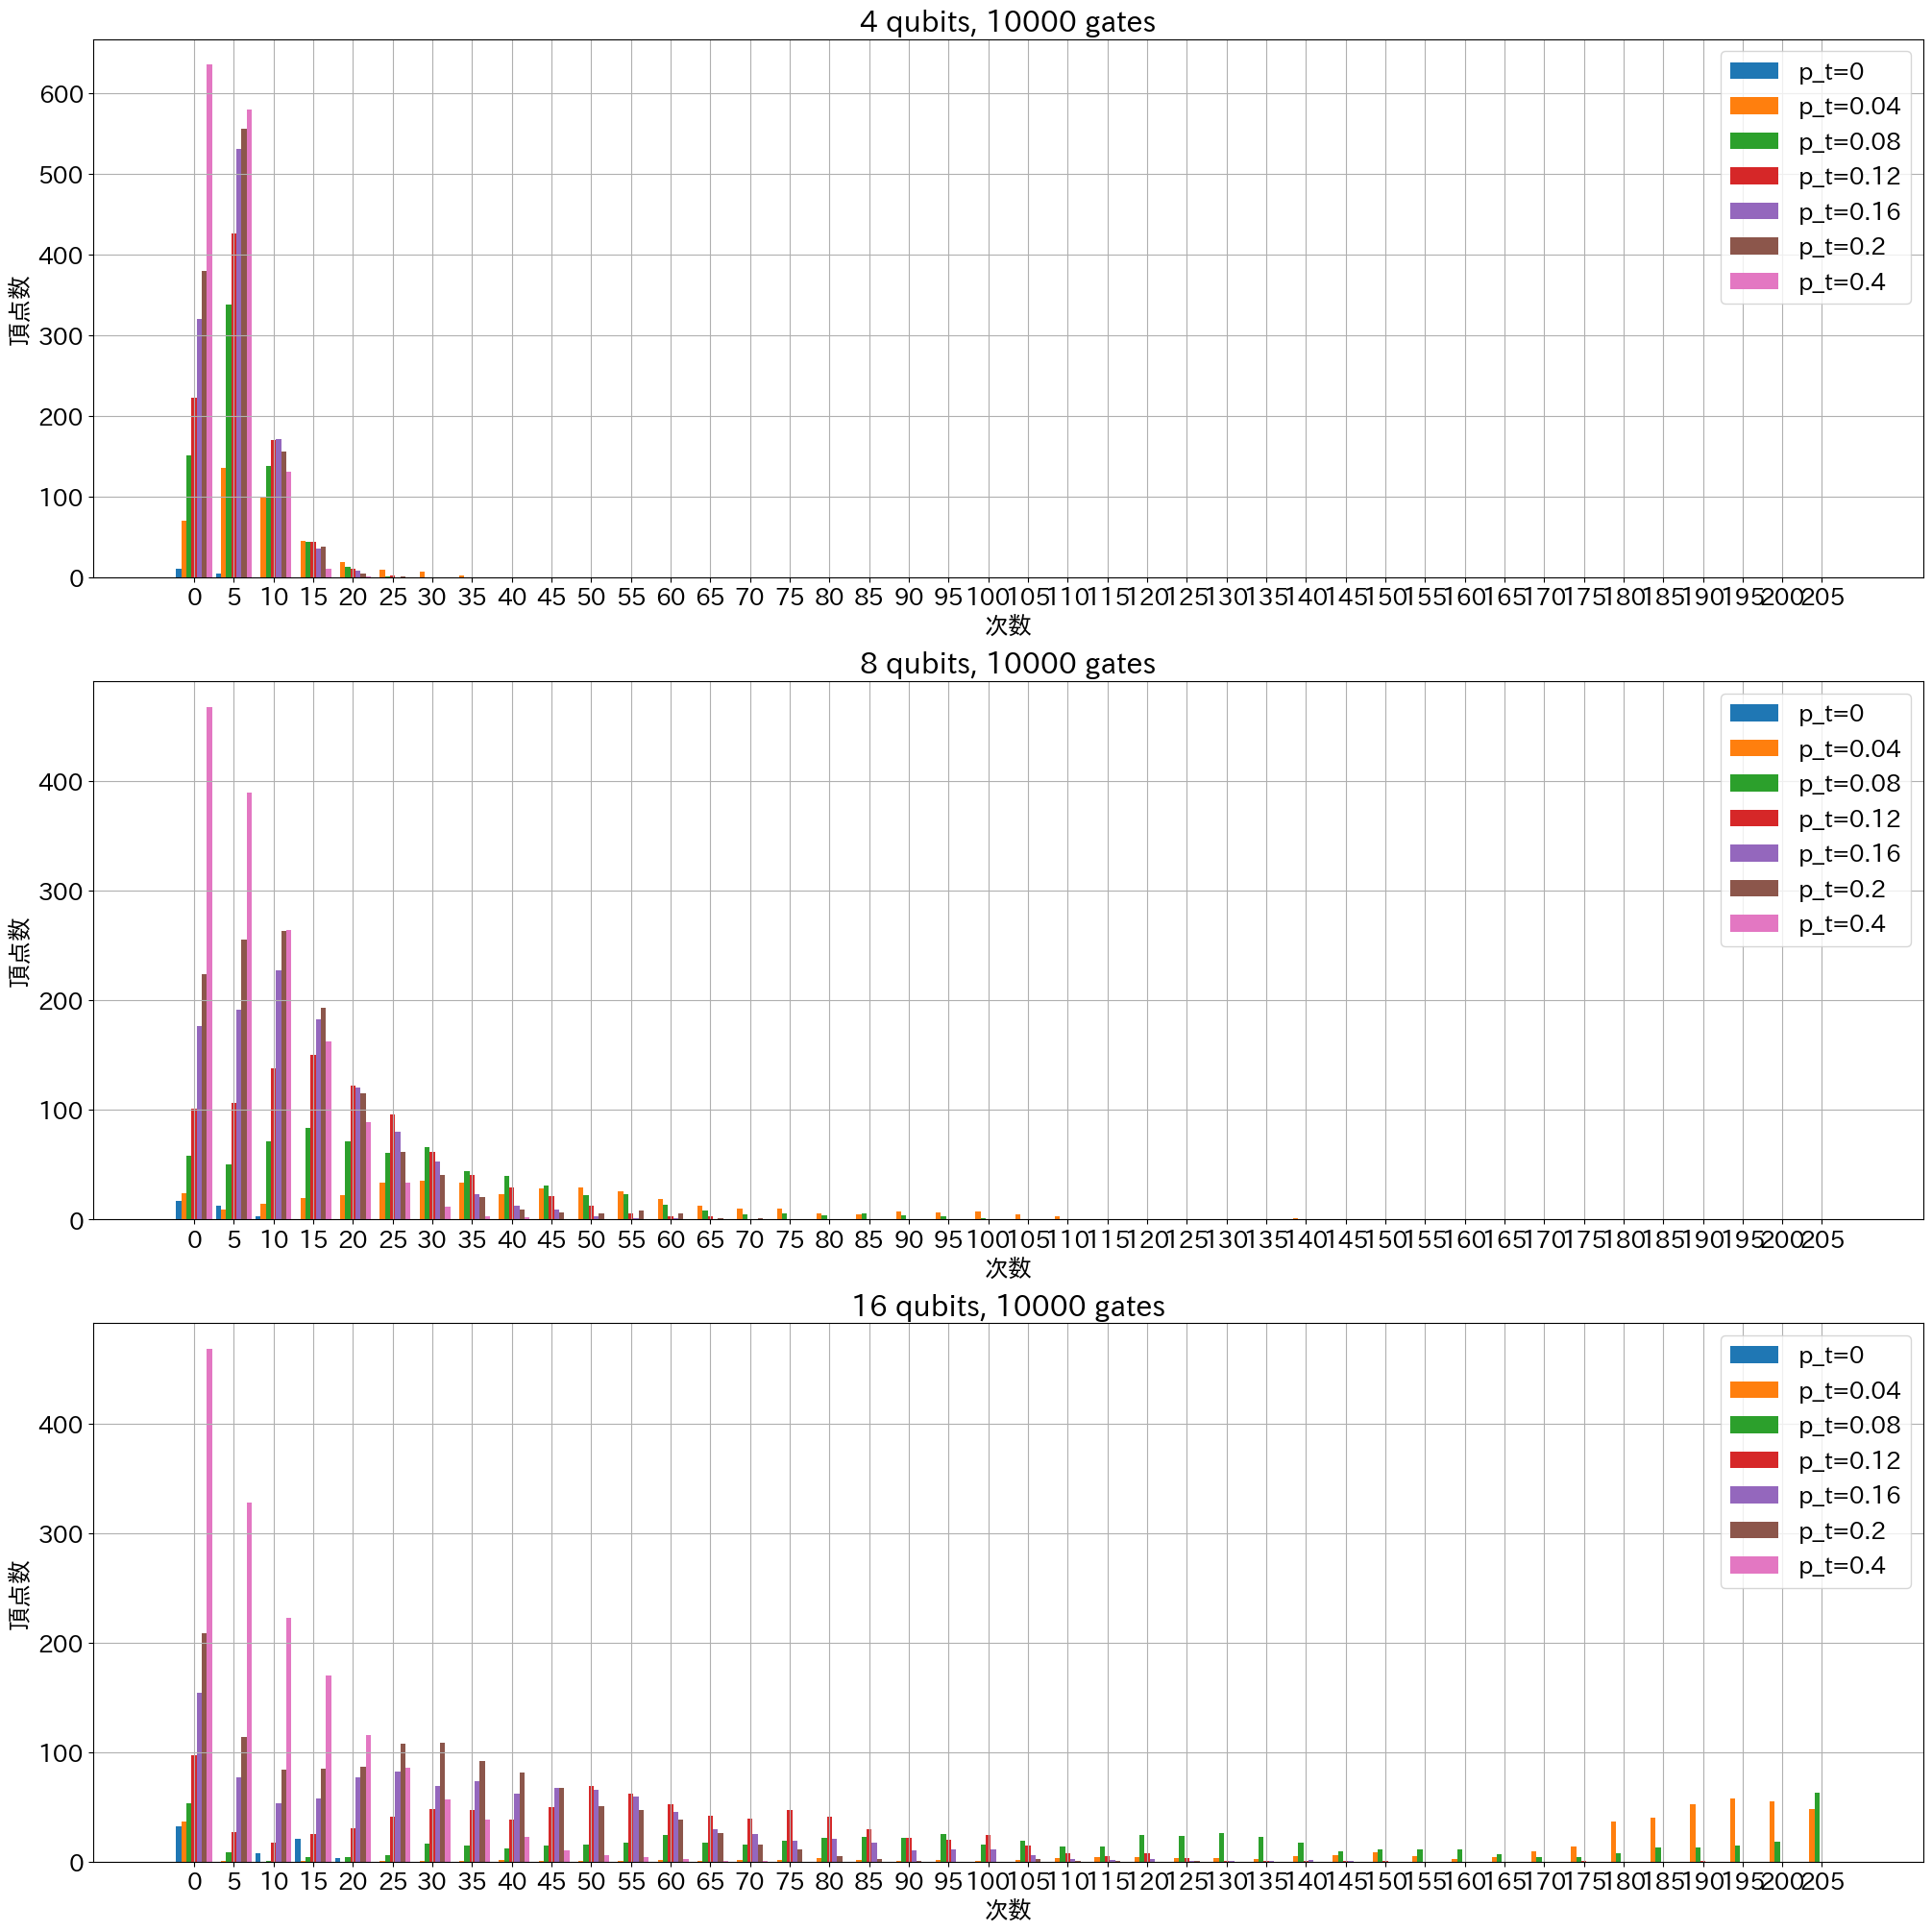

In [130]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("頂点数")
    ax[qubit].set_xticks(np.arange(0, 206, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df2[(df2["p_t"] == p_t_lists[p_t]) & 
                  (df2["qubit"] == qubits[qubit]) & 
                  (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        numeric_data = df_avg.iloc[0].values.tolist()

        # x軸の位置を調整
        x = [i for i in range(0, 206, 5)]
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

[0.7234042553191489, 0.276595744680851, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.18127147766323023, 0.34879725085910657, 0.2551546391752577, 0.11597938144329897, 0.0506872852233677, 0.024054982817869417, 0.01804123711340206, 0.005154639175257732, 0.000859106529209622, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.22011661807580174, 0.4931972789115646, 0.20165208940719145, 0.06365403304178814, 0.019436345966958212, 0.0009718172983479105, 0.00048590864917395527, 0.00048590864917395527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2548571428571429, 0.4872380952380953, 0.19390476190476

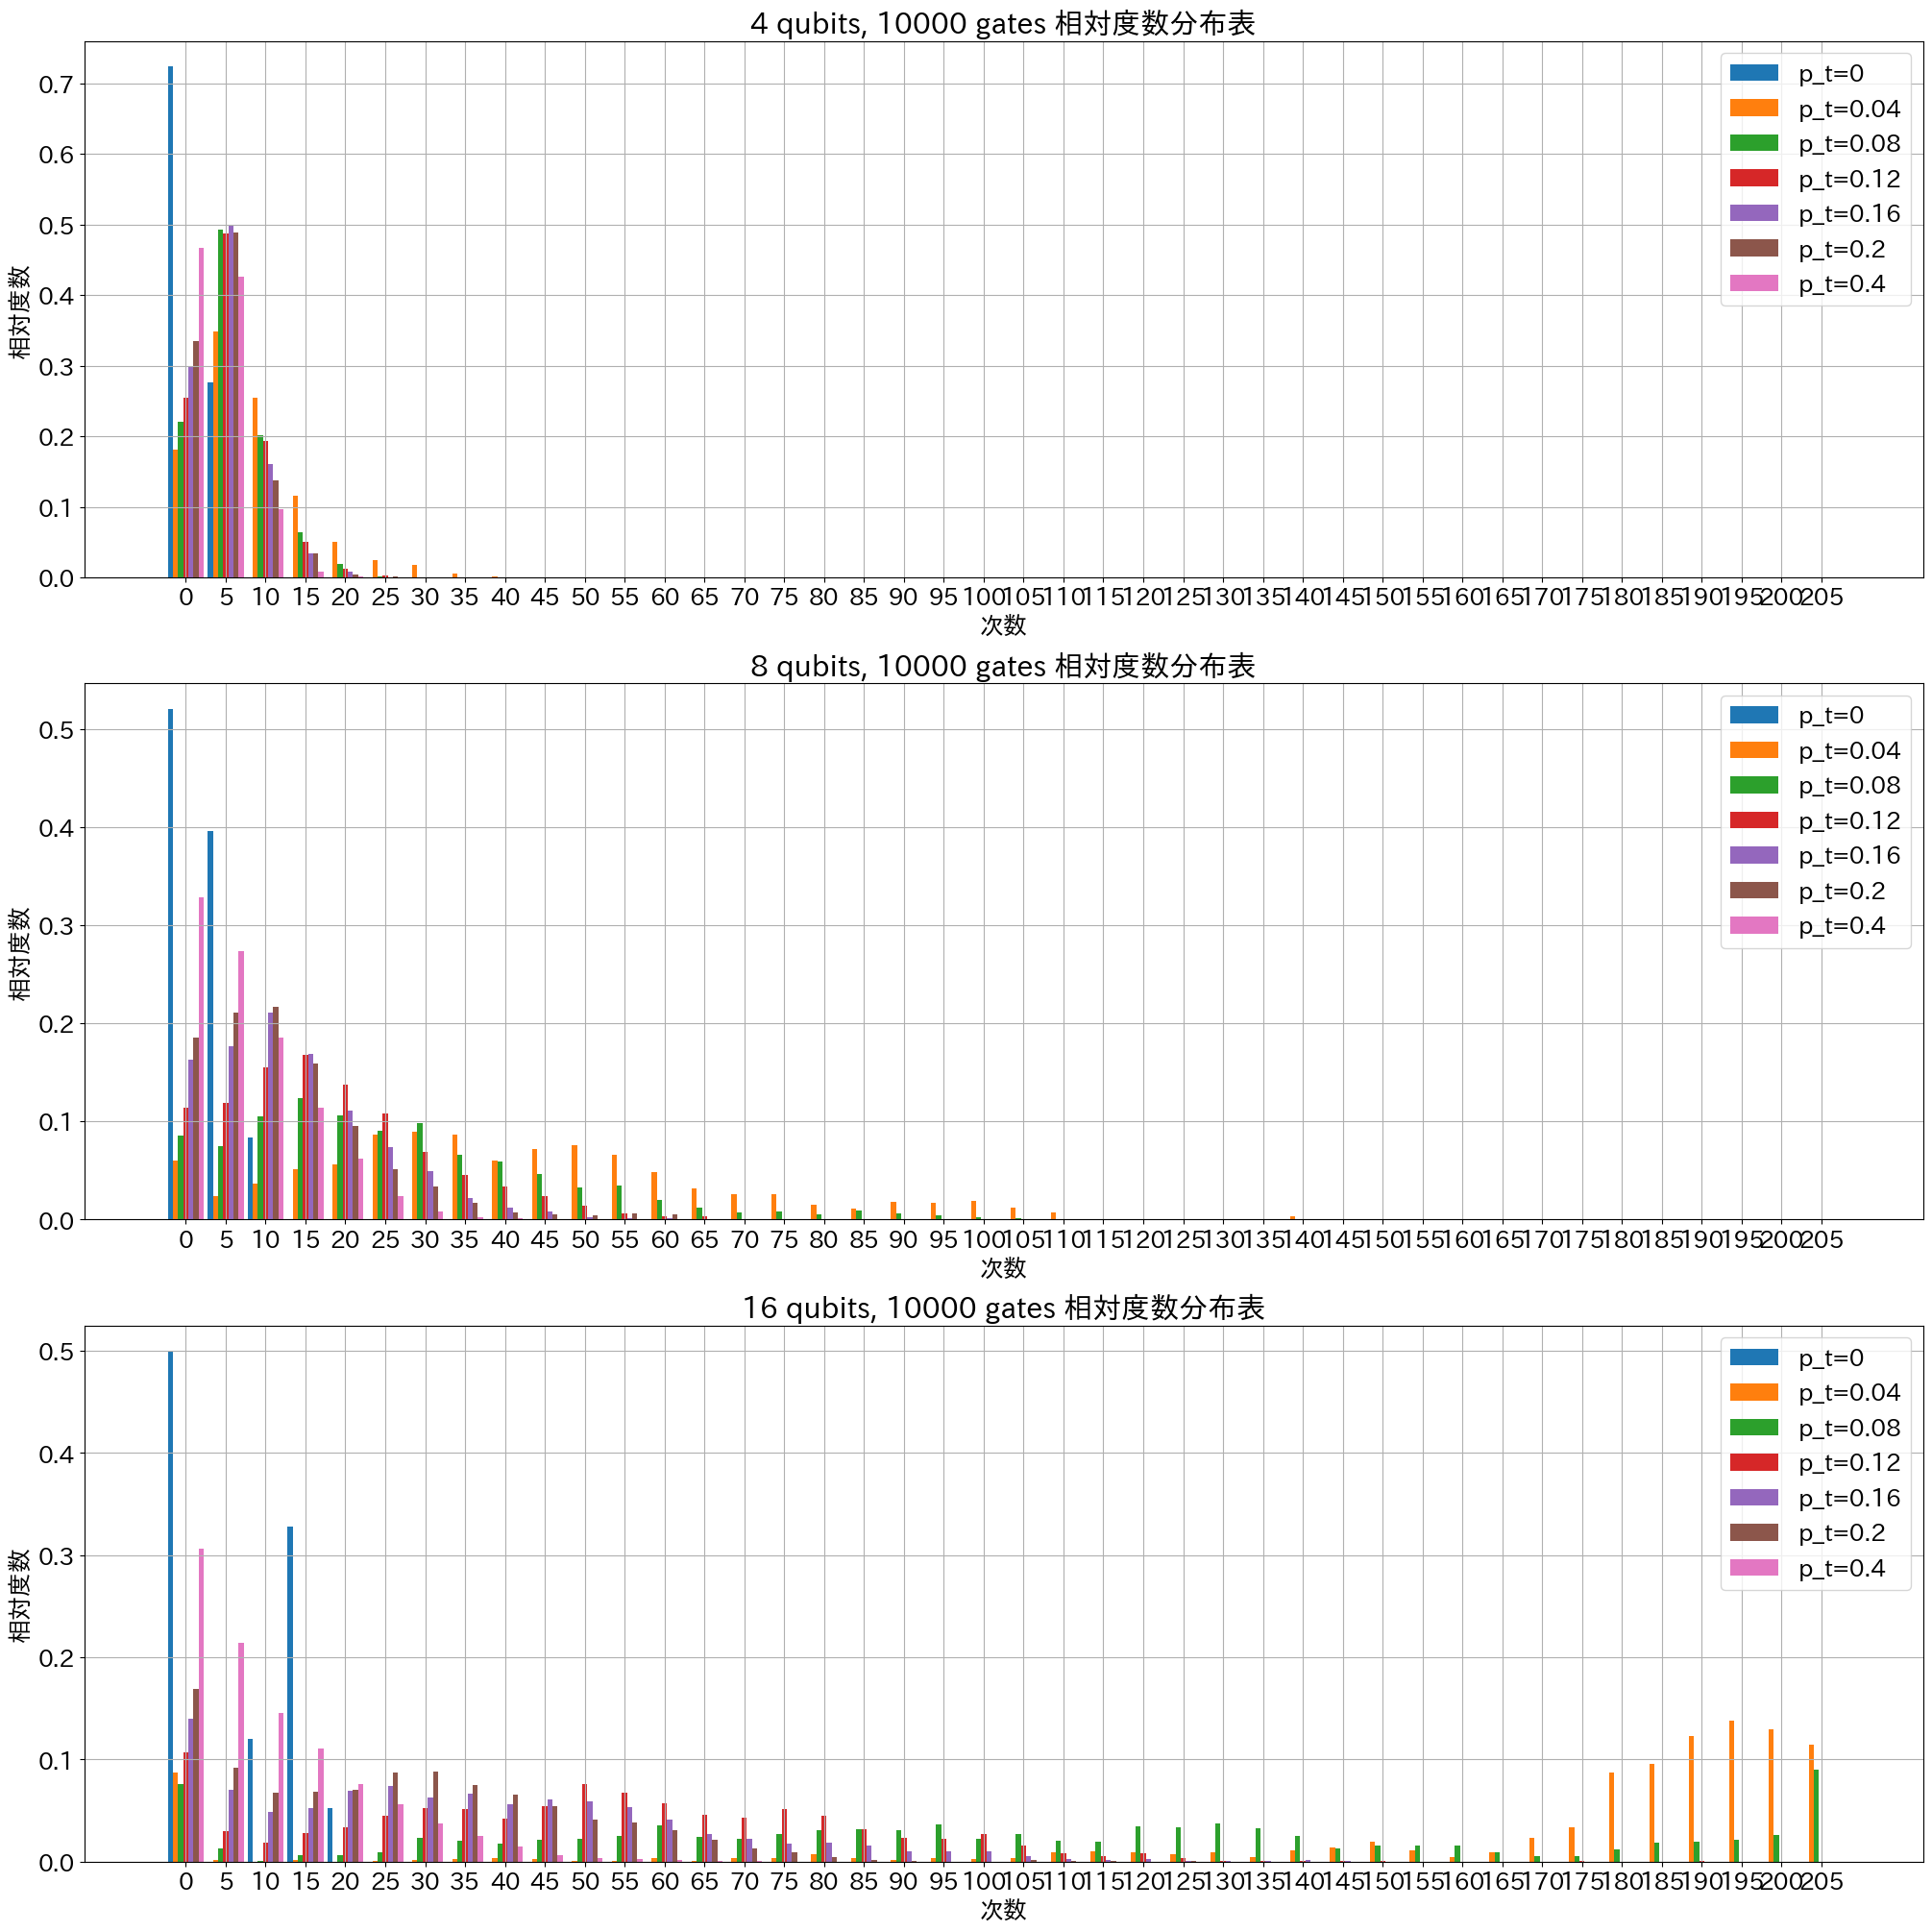

In [149]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

# 棒グラフの幅に関する設定
total_width = 4.5  # 横軸全体に占める幅
num_bars = len(p_t_lists)  # 棒グラフの本数
bar_width = total_width / num_bars  # 各棒グラフの幅

fig, ax = plt.subplots(len(qubits), figsize=(20, 20), constrained_layout=True)
plt.rcParams.update({'font.size': 18}) 
for qubit in range(len(qubits)):
    ax[qubit].set_title(f"{qubits[qubit]} qubits, 10000 gates 相対度数分布表")
    ax[qubit].set_xlabel("次数")
    ax[qubit].set_ylabel("相対度数")
    ax[qubit].set_xticks(np.arange(0, 206, 5))
    ax[qubit].grid(True)

    for p_t in range(len(p_t_lists)):
        # データのフィルタリング
        data = df2[(df2["p_t"] == p_t_lists[p_t]) & 
                  (df2["qubit"] == qubits[qubit]) & 
                  (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        numeric_data = df_avg.iloc[0].values.tolist()
        #numetric_dataの各要素を正規化
        numeric_data = [i/sum(numeric_data) for i in numeric_data]
        #numetic_dataの歪度を計算しprint
        print(numeric_data)
        #print(skew(numeric_data))
        # x軸の位置を調整
        x = [i for i in range(0, 206, 5)]
        x_positions = [val + (p_t - (num_bars - 1) / 2) * bar_width for val in x]

        # 棒グラフの描画
        ax[qubit].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}", 
                      width=bar_width)

    # 凡例の追加
    ax[qubit].legend()

plt.show()

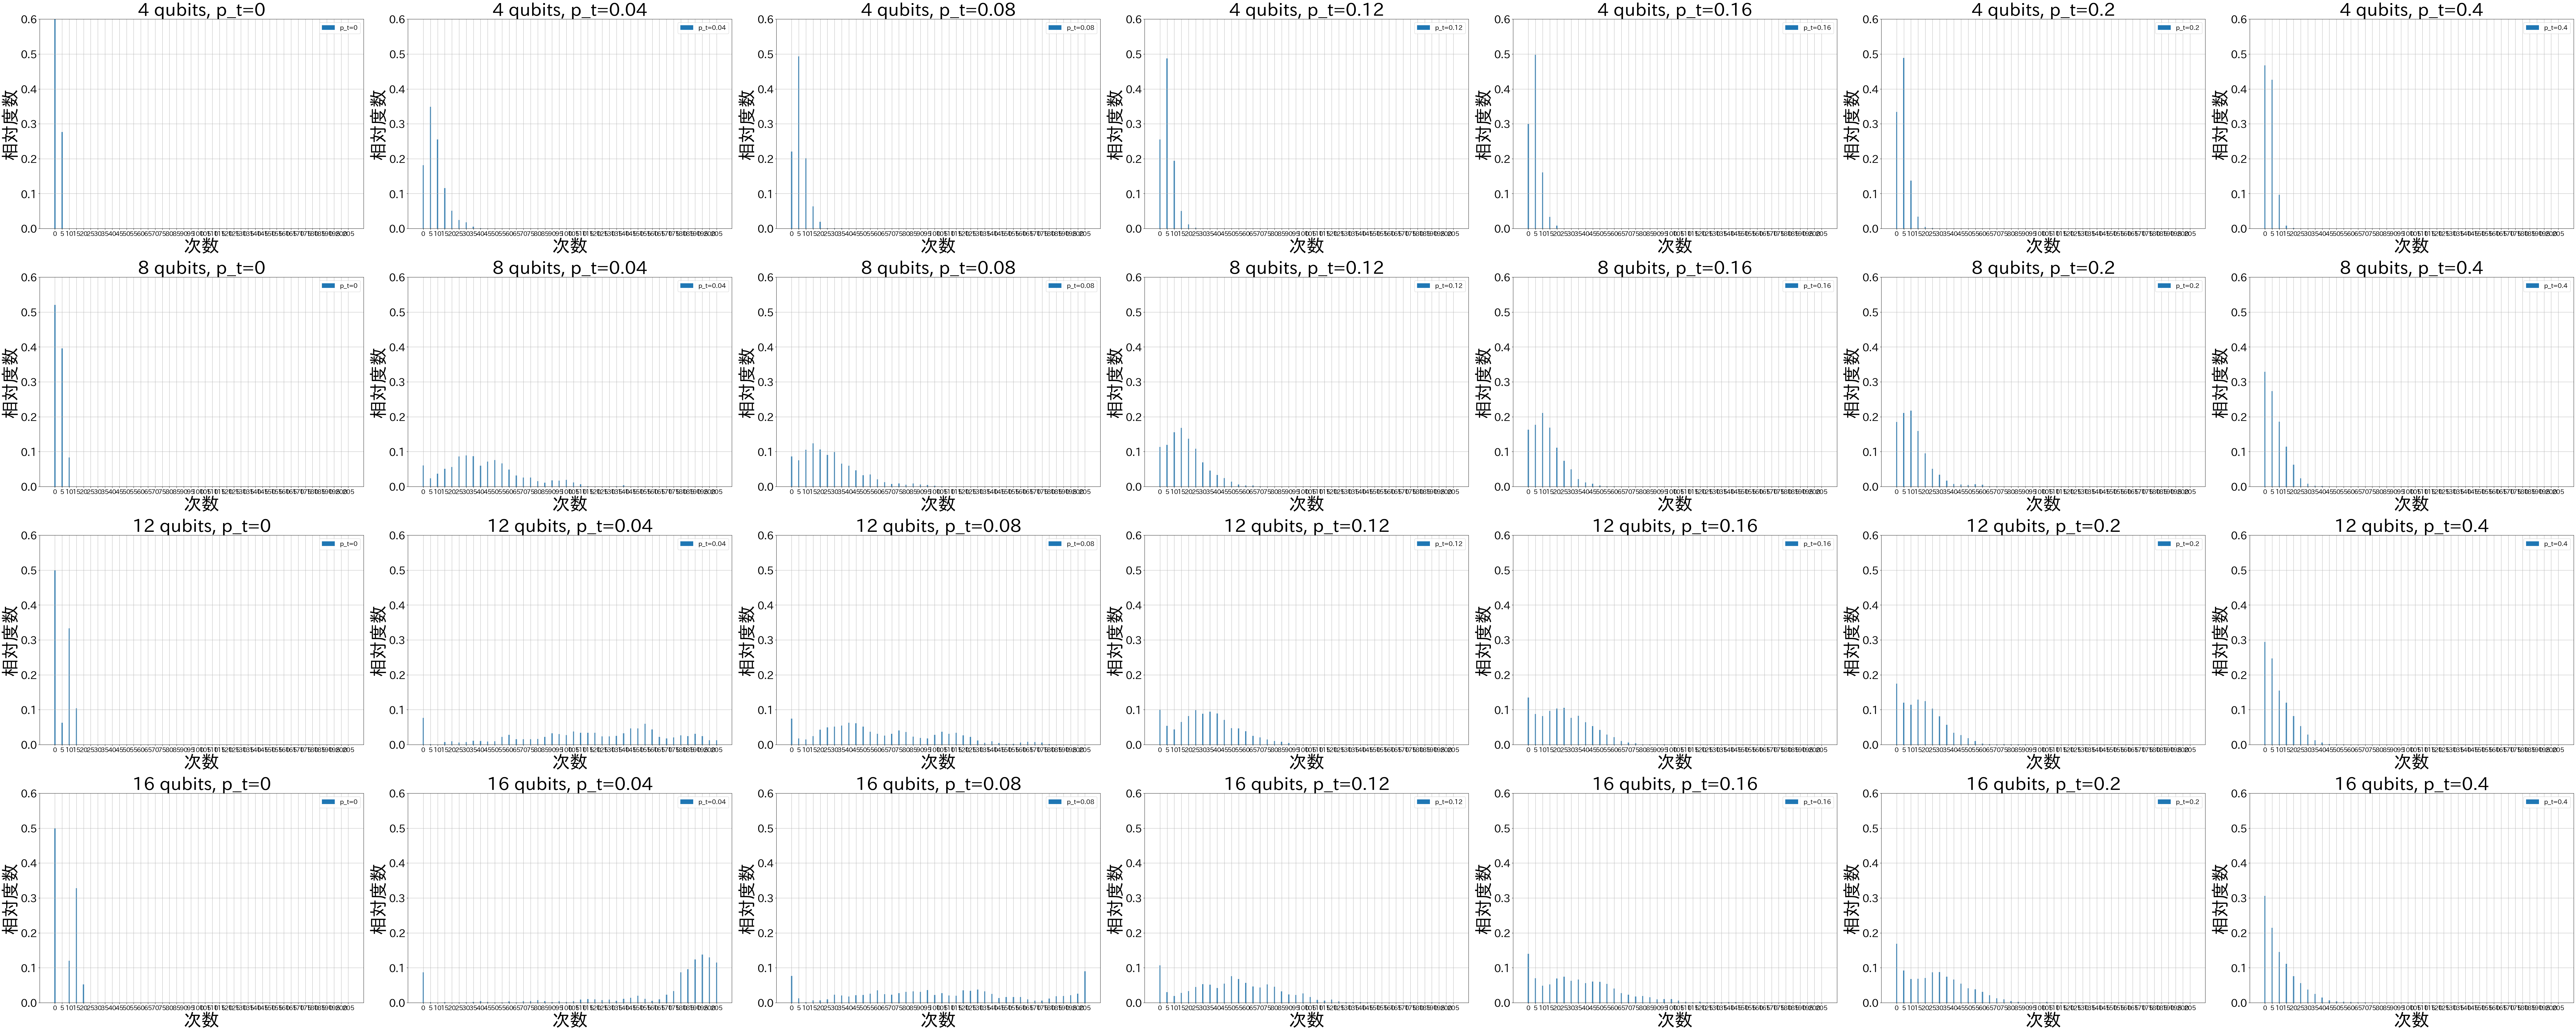

In [191]:
#各分布表を個別に表示
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(100, 40),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}",
                                     fontdict={'fontsize': 50})
            ax[qubit][p_t].set_xlabel("次数",fontdict={'fontsize': 50})
            ax[qubit][p_t].set_ylabel("相対度数",fontdict={'fontsize': 50})
            ax[qubit][p_t].set_xticks(np.arange(0, 206, 5))
            #縦軸の最大値を0.5に設定
            ax[qubit][p_t].set_ylim(0,0.6)
            ax[qubit][p_t].grid(True)
            ax[qubit][p_t].tick_params(axis='y', labelsize=30)

            data = df2[(df2["p_t"] == p_t_lists[p_t]) & (df2["qubit"] == qubits[qubit]) & (df2["input_gates"] == 10000)]
            df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
            numeric_data = df_avg.iloc[0].values.tolist()
            #numetric_dataの各要素を正規化
            numeric_data = [i/sum(numeric_data) for i in numeric_data]

            # x軸の位置を調整
            x = [i for i in range(0, 206, 5)]
            x_positions = [val for val in x]

            # 棒グラフの描画
            ax[qubit][p_t].bar(x_positions, numeric_data, 
                      label=f"p_t={p_t_lists[p_t]}")

            # 凡例の追加
            ax[qubit][p_t].legend()
plt.show()


5.307440160731536
5.307440160731536
3.364373379969695
3.3643733799696944
4.299924951191865
4.299924951191866
4.187817231253001
4.187817231253004
4.216772582960194
4.216772582960195
4.168349719650274
4.168349719650275
4.120235773028785
4.120235773028788
4.2772084051917165
4.277208405191717
0.979442833462158
0.9794428334621579
1.3932813379006757
1.3932813379006763
1.9112385668458753
1.9112385668458747
2.301697777760479
2.301697777760479
2.5067316592840543
2.5067316592840543
3.239312802982971
3.239312802982973
4.257195959583886
4.257195959583886
1.846181359769677
1.8461813597696763
2.2159251668130984
2.2159251668130975
1.0060727011041943
1.006072701104194
1.478696409782934
1.478696409782934
1.776609377966984
1.7766093779669831
3.190173788401799
3.190173788401799


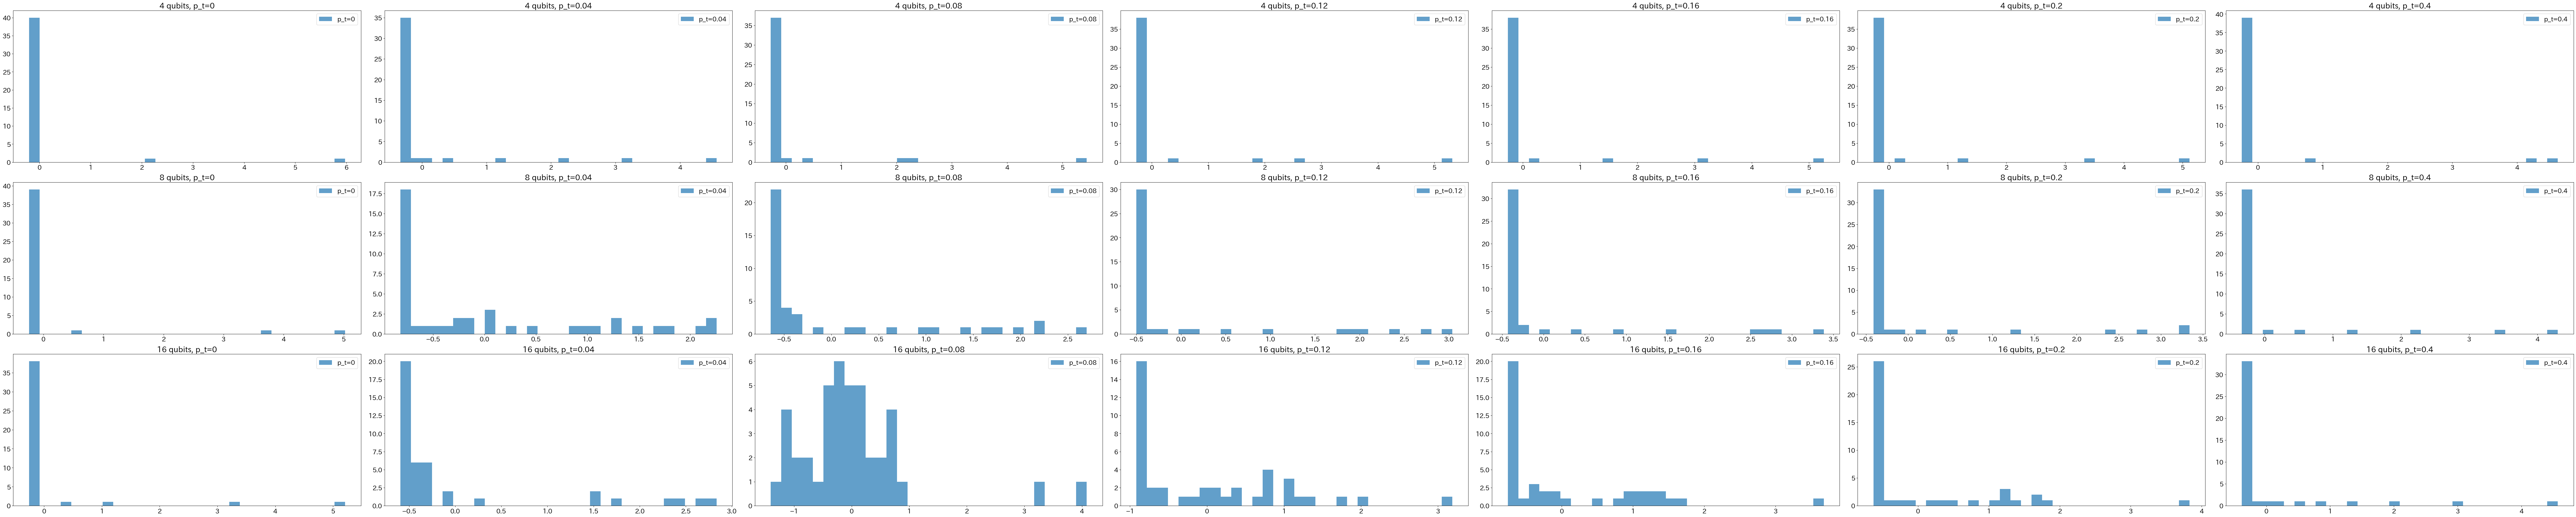

In [ ]:
#各分布表を個別に表示
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(100, 20),constrained_layout=True)
for qubit in range(len(qubits)):
        for p_t in range(len(p_t_lists)):
            ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, p_t={p_t_lists[p_t]}")
            data = df2[(df2["p_t"] == p_t_lists[p_t]) & (df2["qubit"] == qubits[qubit]) & (df2["input_gates"] == 10000)]
            df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
            numeric_data = df_avg.iloc[0].values.tolist()
            #print(numeric_data)
            #Z-score normalization
            print(skew(numeric_data))
            mean = np.mean(numeric_data)
            std_dev = np.std(numeric_data)
            z_normalized = (numeric_data - mean) / std_dev
            #print(z_normalized.mean())
            #歪度を計算
            #print(skew(z_normalized))
            
            #ヒストグラムの描画
            ax[qubit][p_t].hist(z_normalized, bins=30, alpha=0.7, label=f"p_t={p_t_lists[p_t]}")
            ax[qubit][p_t].legend()
plt.show()

[np.float64(5.307440160731538), np.float64(3.3643733799696944), np.float64(4.299924951191864), np.float64(4.187817231253002), np.float64(4.216772582960192), np.float64(4.1683497196502755), np.float64(4.120235773028784), np.float64(4.2772084051917165), np.float64(0.9794428334621578), np.float64(1.3932813379006759), np.float64(1.9112385668458756), np.float64(2.301697777760478), np.float64(2.5067316592840516), np.float64(3.2393128029829725), np.float64(4.257195959583886), np.float64(1.8461813597696763), np.float64(2.2159251668130975), np.float64(1.0060727011041943), np.float64(1.478696409782934), np.float64(1.776609377966984), np.float64(3.190173788401799)]
[np.float64(9.333333333333334), np.float64(713.3333333333334), np.float64(1210.0), np.float64(1512.3333333333333), np.float64(1726.6666666666667), np.float64(1792.3333333333333), np.float64(1841.0), np.float64(40.666666666666664), np.float64(1604.3333333333333), np.float64(2548.0), np.float64(3200.6666666666665), np.float64(3520.666666

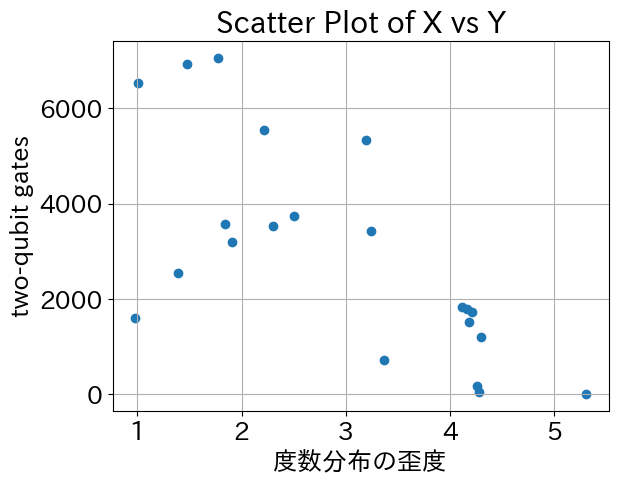

In [ ]:
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 16]
#gates = [500, 1000, 5000, 10000]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

plt.title('Scatter Plot of X vs Y')  # タイトル
plt.xlabel('度数分布の歪度')  # X軸ラベル
plt.ylabel('two-qubit gates')  # Y軸ラベル
plt.grid(True)  # グリッドを表示

x =[]
y =[]

for q in qubits:
    for p_t in p_t_lists:
        data = df2[(df2["p_t"] == p_t) & (df2["qubit"] == q) & (df2["input_gates"] == 10000)]
        df_avg = data.groupby("optimize_name")[plot_columns_str].mean()
        frequency = []
        #df_avg　から各次数を取り出して、dosuに格納
        for i in range(0, 206, 5):
            frequency.append(df_avg.iloc[0][str(i)])
        #相対度数分布へ
        relative_frequency = frequency / np.sum(frequency) 
        #dosuからskewnessを計算
        skewness = skew(relative_frequency)
        #print(skewness)

        #two-qubit_gatesの平均値を取得
        data2 = data.groupby("optimize_name")["two-qubit_gates"].mean()
        two_qubit_gates = data2.iloc[0]
        #print(two_qubit_gates)

        #散布図の描画
        #plt.scatter(skewness, two_qubit_gates, label=f"qubit={q}, p_t={p_t}")
        x.append(skewness)
        y.append(two_qubit_gates)

print(x)
print(y)
plt.scatter(x, y)
#plt.legend()  # 凡例を表示
plt.show()



1.571508203526583
1.571508203526583


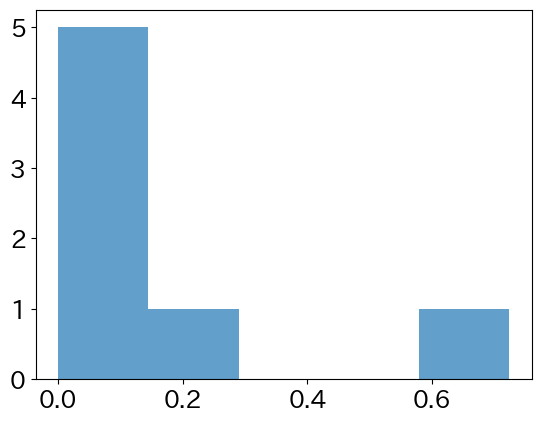

In [ ]:
x =[0.7234042553191489, 0.276595744680851,0,0,0,0,0]
#xを正規化

skew(x)
print(skew(x))
from scipy.stats import zscore
print(np.mean(zscore(x)**3))

plt.hist(x, bins=5, alpha=0.7)

import matplotlib.pyplot as plt
import numpy as np


# ランダムなデータを生成（例えば、正規分布に従うデータ）
data = np.random.randn(1000)
# ヒストグラムを作成
#plt.hist(data, bins=30, edgecolor='black')

# タイトルとラベルの設定
#plt.title('Histogram Example')
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#print(skew(data))

# ヒストグラムを表示
#plt.show()

In [5]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0114bunpu_10000.csv"
df = pd.read_csv(csv_file_path)


/tmp/ipykernel_326909/427631252.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  souwa += columns_after_0[i] * (2.5 + 5 * i)


(280, 4)
Qubit = 4: -0.8833083352966289
Qubit = 8: -0.8992512819412615
Qubit = 12: -0.887084547732368
Qubit = 16: -0.753943968130981


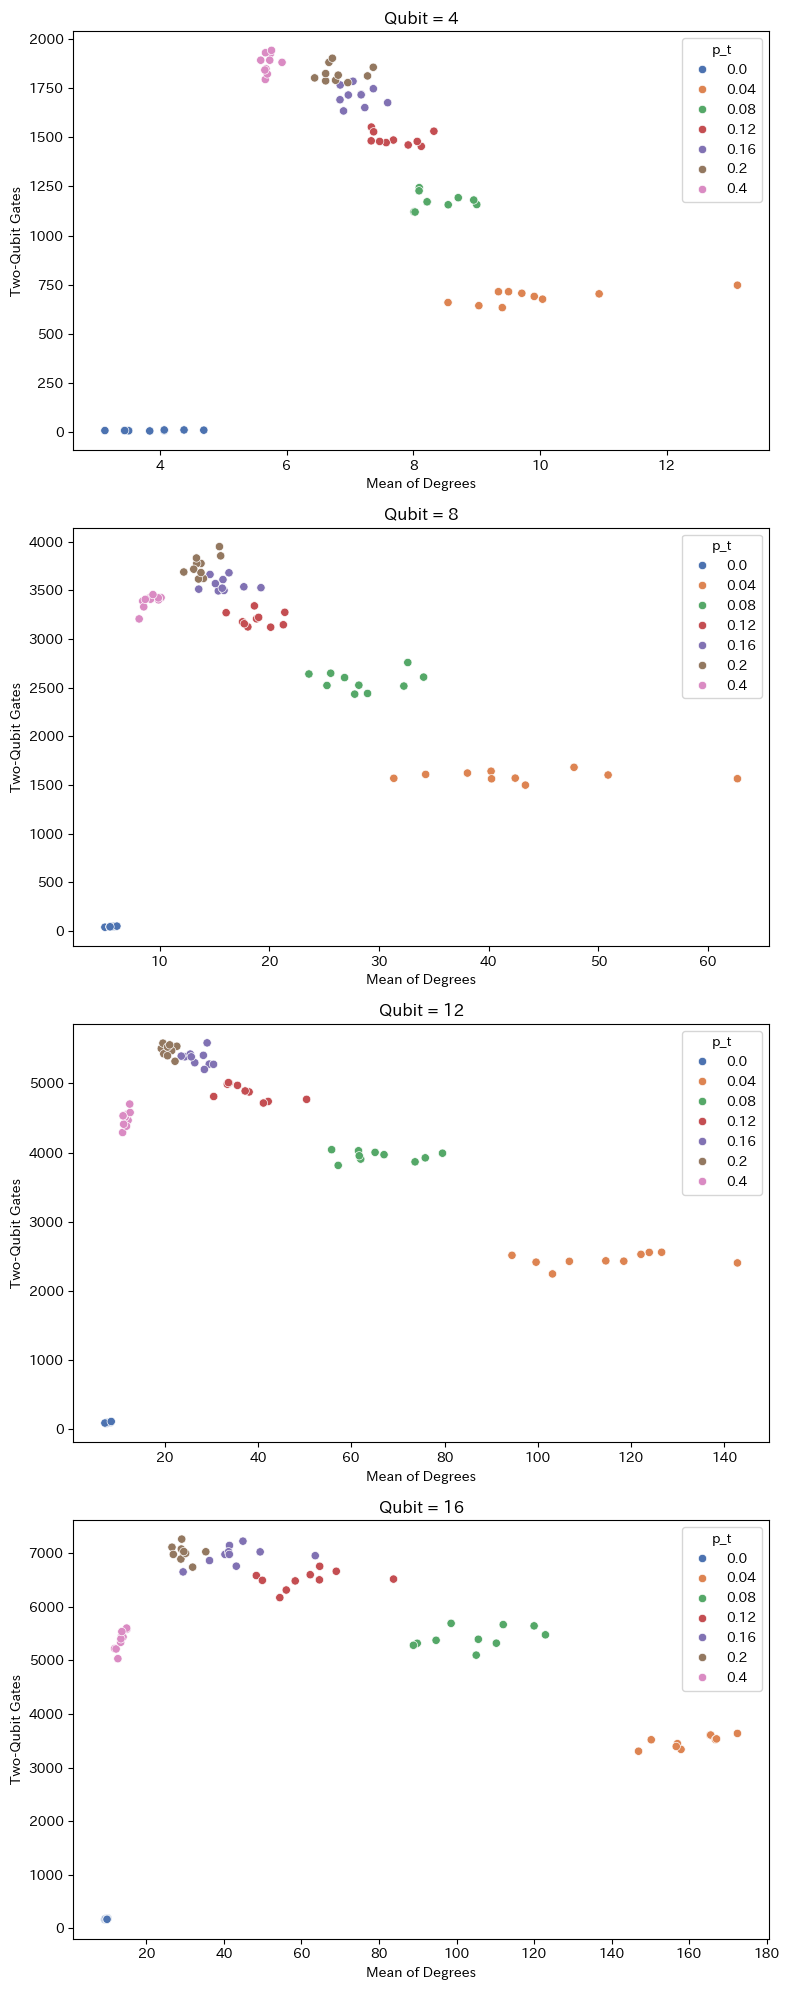

In [44]:
#横軸、次数の特徴量　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #print(columns_after_0)
            #平均値
            #要素数の和
            sum = columns_after_0.sum()
            #総和
            souwa =0
            for i in range(len(columns_after_0)):
                souwa += columns_after_0[i] * (2.5 + 5 * i)

            #次数の平均値
            mean = souwa / sum

            x.append(mean)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Mean of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()


(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)
(10, 53)


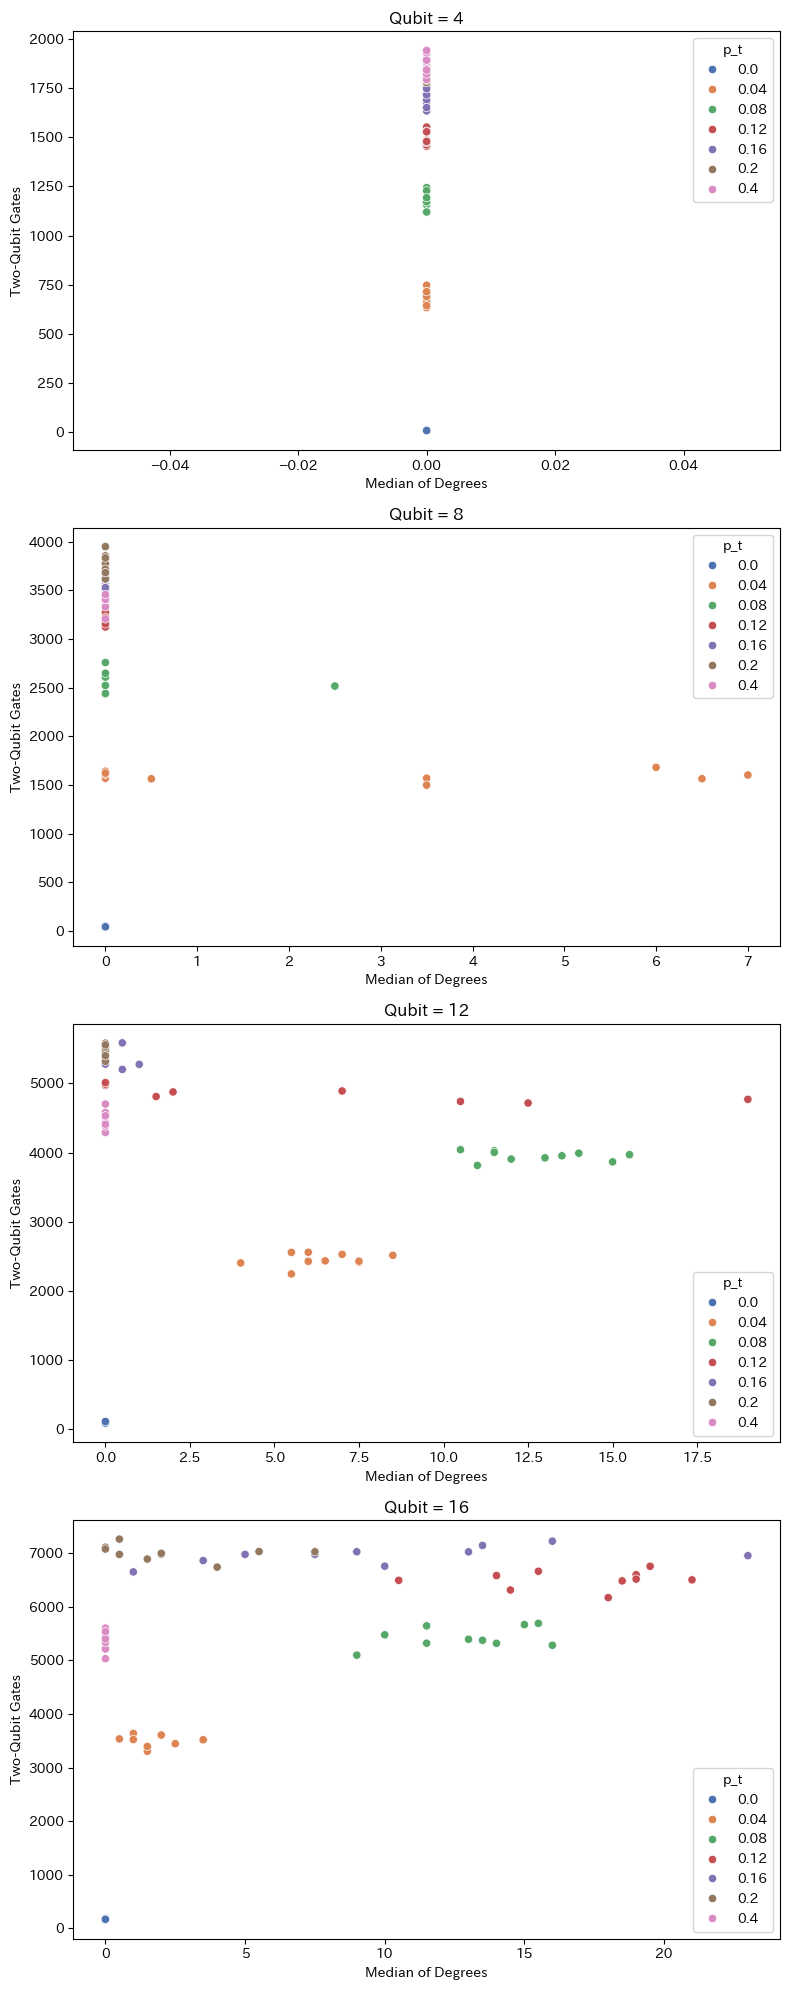

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

qubits = [4, 8, 12, 16]
p_t_lists = [0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x = []
y = []
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        print(data.shape)
        for index, row in data.iterrows():
            # 2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            # 次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            # 次数の中央値を計算
            median = np.median(columns_after_0)
            
            x.append(median)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

# データフレームを作成
df_plot = pd.DataFrame({
    'median': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    # paletteをviridis以外
    sns.scatterplot(data=subset, x='median', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Median of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# レイアウト調整
plt.tight_layout()
plt.show()

In [45]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0114bunpu_10000_30zutu.csv"
df = pd.read_csv(csv_file_path)

(840, 4)
Qubit = 4: nan
Qubit = 8: nan
Qubit = 12: nan
Qubit = 16: nan


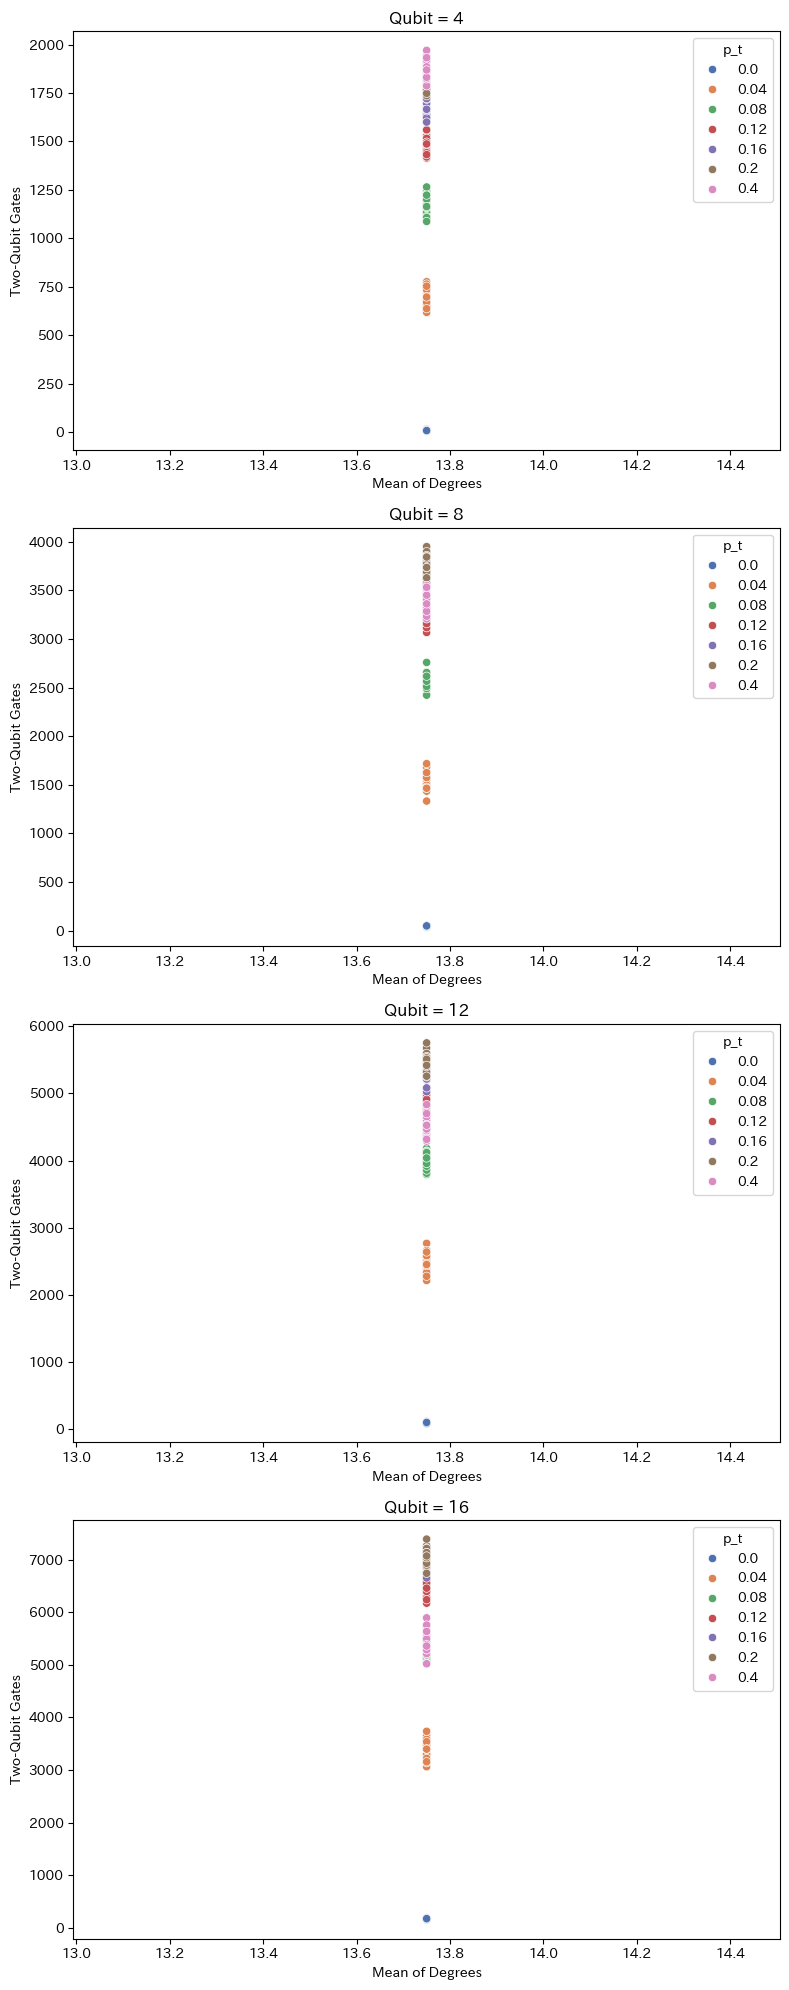

In [64]:
#横軸 分布の平均
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #columns_after_0の中央値
            median = np.median(columns_after_0)

            x.append(mean)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Mean of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

/tmp/ipykernel_326909/618369354.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  souwa += columns_after_0[i] * (2.5 + 5 * i)


(840, 4)
Qubit = 4: -0.9055391759261098
Qubit = 8: -0.8894537882275997
Qubit = 12: -0.8768884370331756
Qubit = 16: -0.7424756704955933


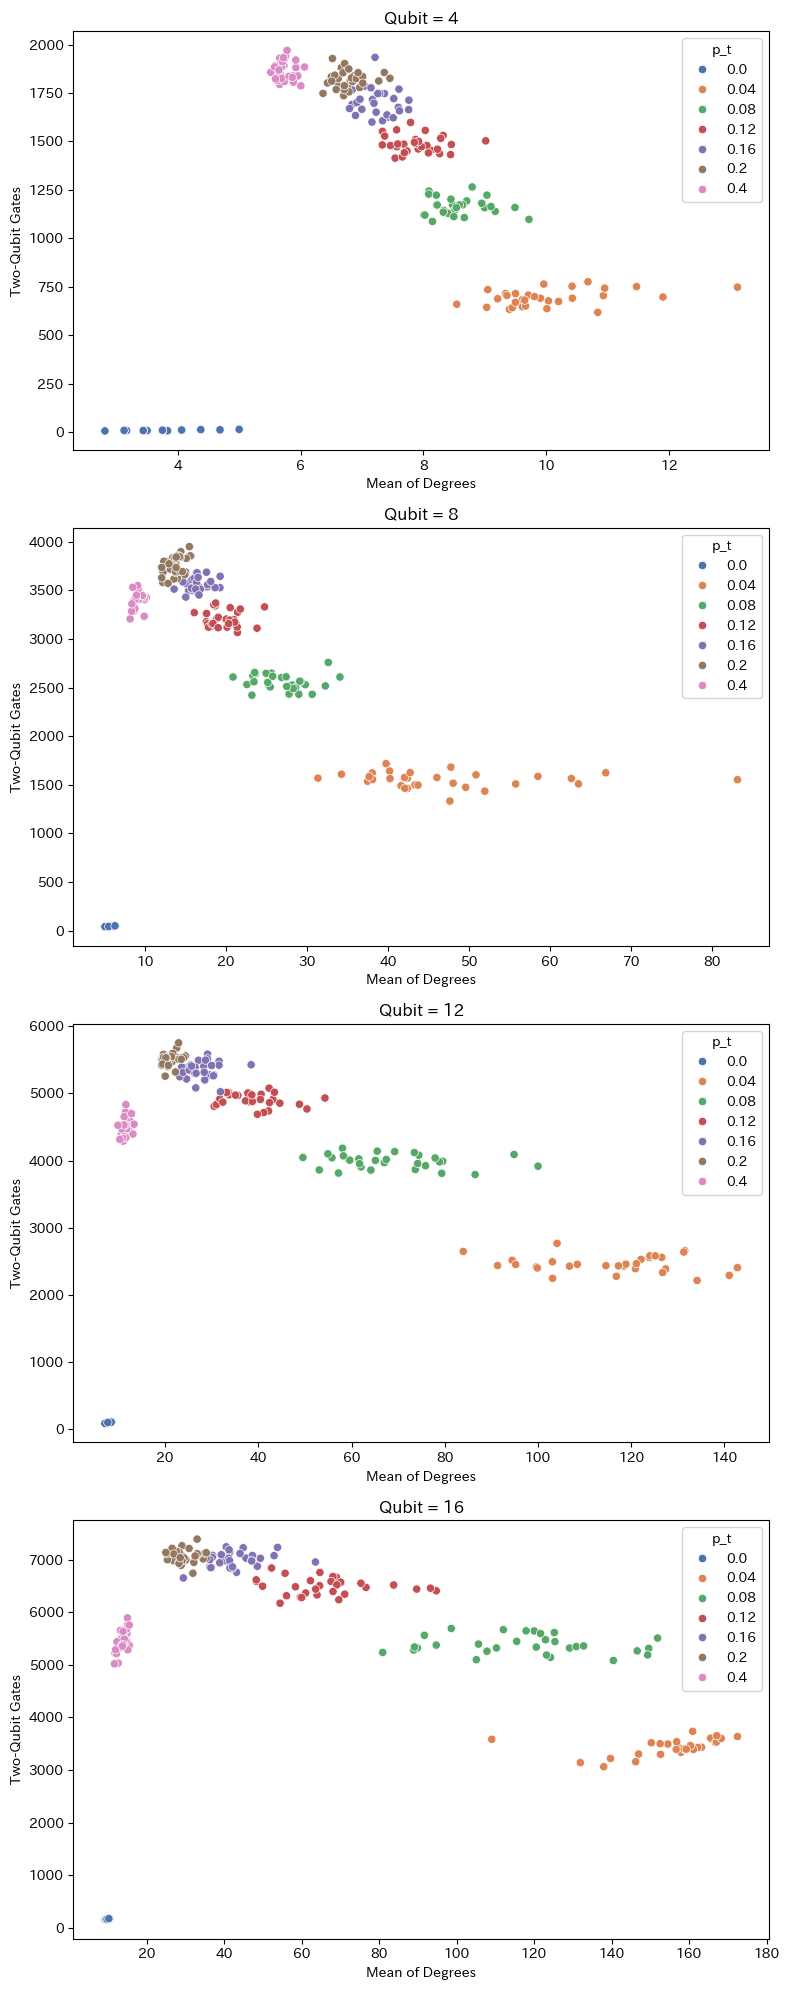

Qubit = 4, p_t = 0: 0.8620170653800725
Qubit = 4, p_t = 0.04: 0.4047922040016095
Qubit = 4, p_t = 0.08: -0.08055412756291798
Qubit = 4, p_t = 0.12: -0.09560876289870579
Qubit = 4, p_t = 0.16: -0.1028627616364713
Qubit = 4, p_t = 0.2: 0.10072472468221003
Qubit = 4, p_t = 0.4: -0.06681437260461413
Qubit = 8, p_t = 0: 0.7636400590802424
Qubit = 8, p_t = 0.04: -0.09564053191732538
Qubit = 8, p_t = 0.08: -0.14889553991115573
Qubit = 8, p_t = 0.12: -0.03849737069033605
Qubit = 8, p_t = 0.16: -0.0439813131521543
Qubit = 8, p_t = 0.2: 0.4654463186404065
Qubit = 8, p_t = 0.4: 0.29533220170072544
Qubit = 12, p_t = 0: 0.7594963622637189
Qubit = 12, p_t = 0.04: -0.1556106801860737
Qubit = 12, p_t = 0.08: -0.18089643379925588
Qubit = 12, p_t = 0.12: -0.24801838468165105
Qubit = 12, p_t = 0.16: 0.03285137330616504
Qubit = 12, p_t = 0.2: 0.35269135806581986
Qubit = 12, p_t = 0.4: 0.3066920715689223
Qubit = 16, p_t = 0: 0.6601996308984039
Qubit = 16, p_t = 0.04: 0.47295683793772775
Qubit = 16, p_t = 0

In [67]:
#横軸 次数の加重和
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #print(columns_after_0)
            #平均値
            #要素数の和
            sum = columns_after_0.sum()
            #総和
            souwa =0
            for i in range(len(columns_after_0)):
                souwa += columns_after_0[i] * (2.5 + 5 * i)

            #次数の平均値
            mean = souwa / sum

            x.append(mean)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Mean of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整

plt.tight_layout()
plt.savefig("/home/rest/forpyzx/kekka1415/mean_degree_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['mean', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['mean', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(840, 4)
Qubit = 4: 0.9836659703135406
Qubit = 8: -0.2716780273170809
Qubit = 12: -0.5696102768027842
Qubit = 16: -0.29791059121012786


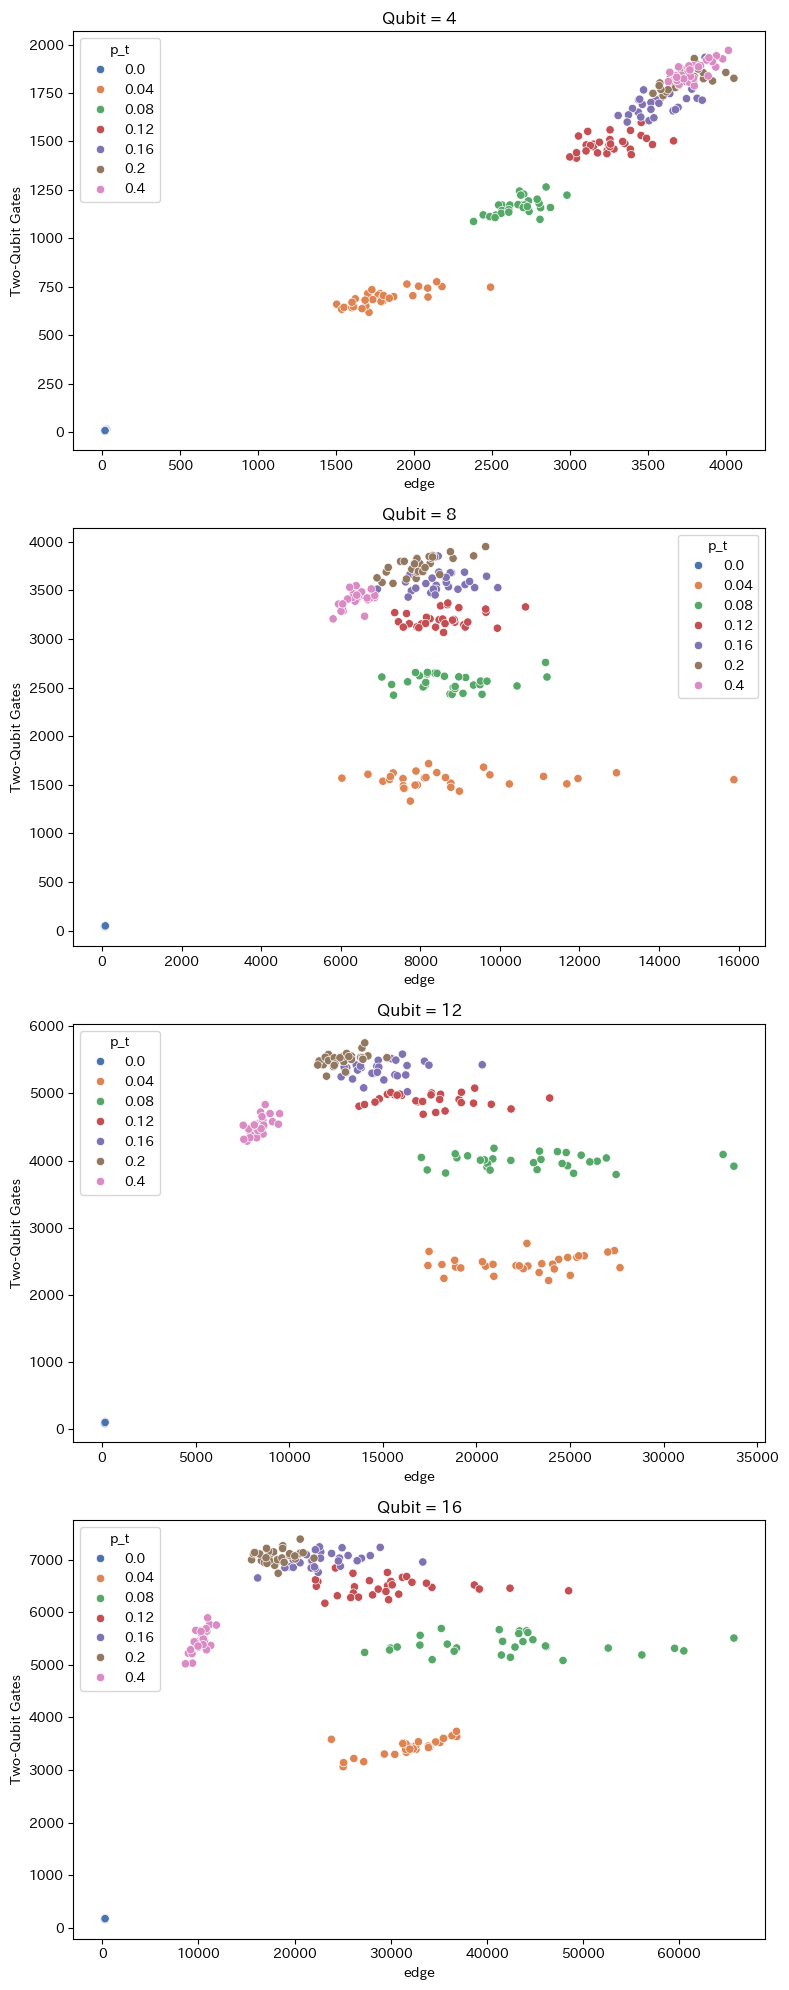

In [55]:
#横軸、次数の特徴量　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            edge = row['edge count']

            x.append(edge)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'edge': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='edge', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('edge')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['edge', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['edge', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.savefig("/home/rest/forpyzx/kekka1415/all_edge_two.pdf", format="pdf")
plt.show()


(840, 4)
Qubit = 4: 0.9792774318466837
Qubit = 8: 0.9284319557977856
Qubit = 12: 0.8733939369589596
Qubit = 16: 0.8186731225676982


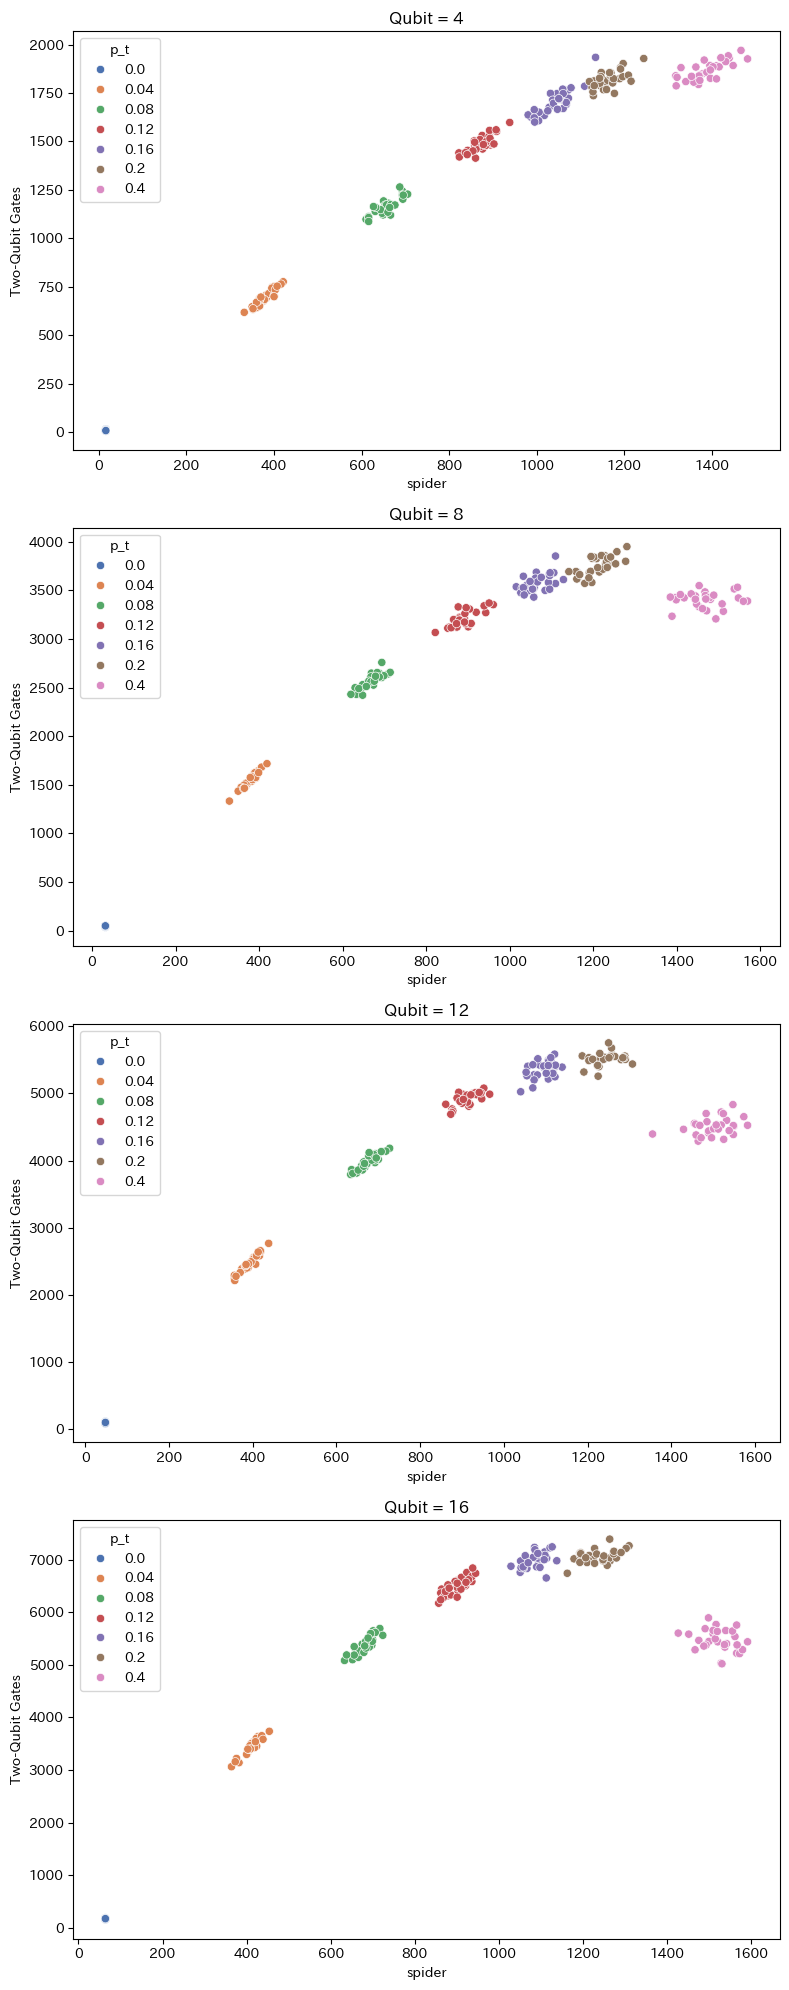

Qubit = 4, p_t = 0: 0.3880608928628567
Qubit = 4, p_t = 0.04: 0.9370423604789476
Qubit = 4, p_t = 0.08: 0.8277322840406839
Qubit = 4, p_t = 0.12: 0.8244812408423386
Qubit = 4, p_t = 0.16: 0.8657230358379656
Qubit = 4, p_t = 0.2: 0.6393264554991626
Qubit = 4, p_t = 0.4: 0.745414622225263
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9716505192702202
Qubit = 8, p_t = 0.08: 0.8571524553104126
Qubit = 8, p_t = 0.12: 0.7463406847353368
Qubit = 8, p_t = 0.16: 0.569542650892297
Qubit = 8, p_t = 0.2: 0.6899720669292332
Qubit = 8, p_t = 0.4: 0.06933098282186123
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9707541500825921
Qubit = 12, p_t = 0.08: 0.8975819597472476
Qubit = 12, p_t = 0.12: 0.7032460551333489
Qubit = 12, p_t = 0.16: 0.4644871595266524
Qubit = 12, p_t = 0.2: 0.2908497445808997
Qubit = 12, p_t = 0.4: 0.3452162667479568
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.953002837864197
Qubit = 16, p_t = 0.08: 0.8692518343830549
Qubit = 16, p_t = 0.12: 0.8150847871979536
Qubi

In [72]:
#横軸　スパイダー　
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            spider = row['spider count']
            x.append(spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) ]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/edge_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(840, 4)
Qubit = 4: -0.9059146529431833
Qubit = 8: -0.8894150245910624
Qubit = 12: -0.8765651397345021
Qubit = 16: -0.7225833384802098


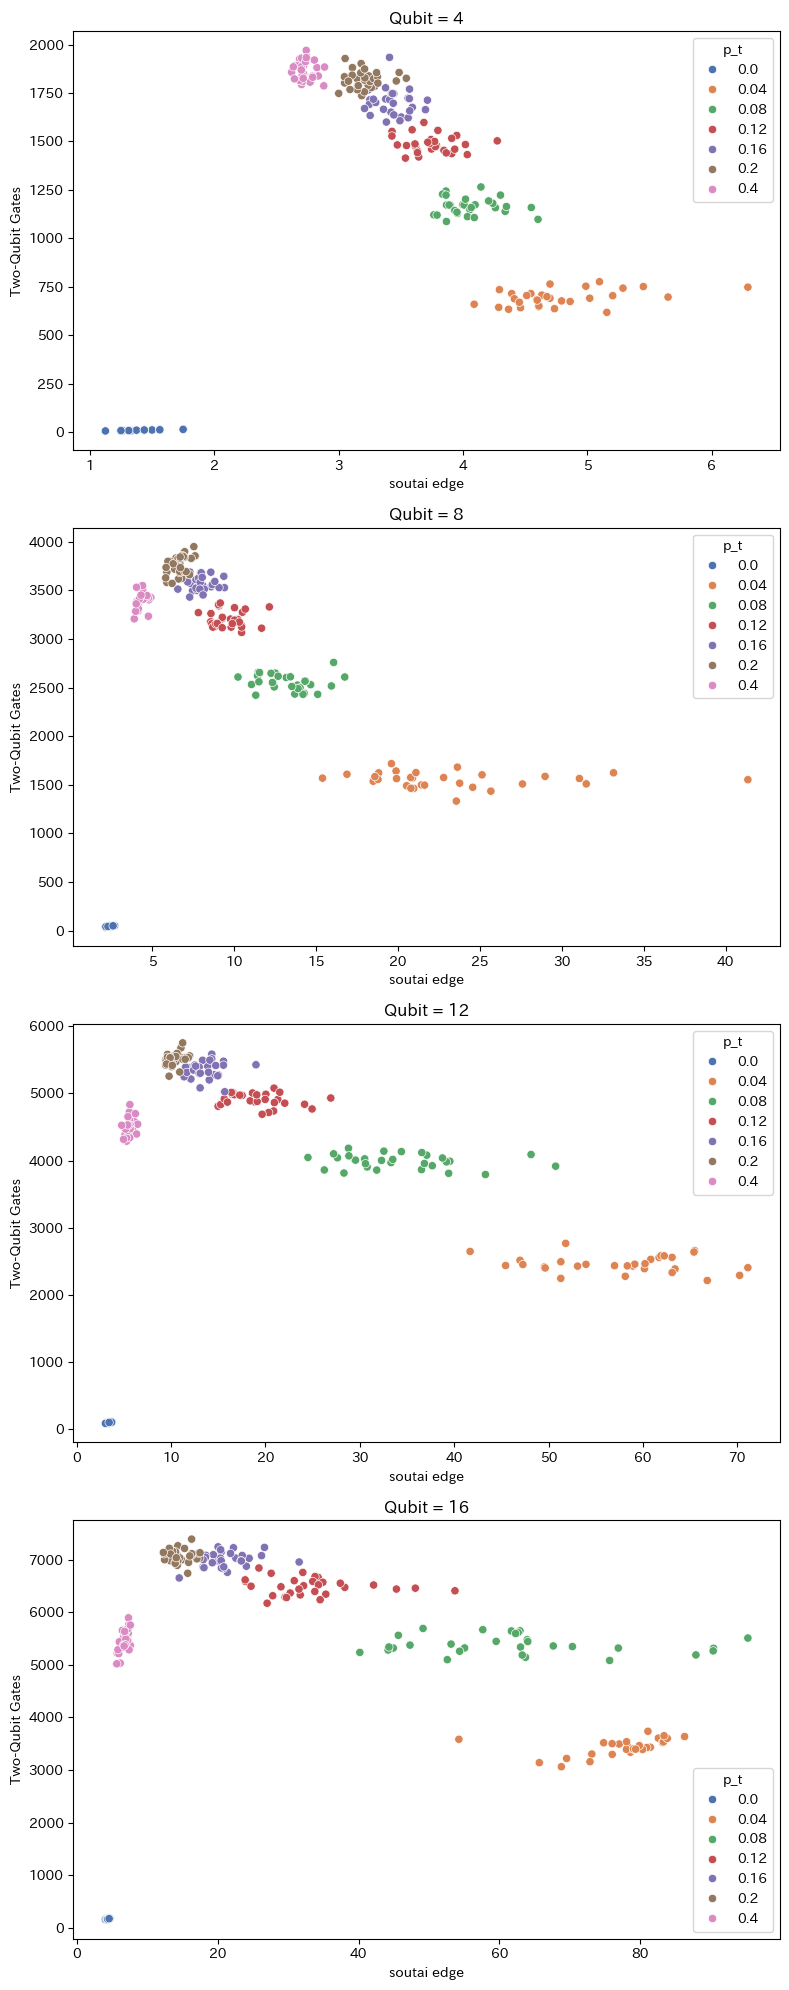

Qubit = 4, p_t = 0: 0.9493445365401599
Qubit = 4, p_t = 0.04: 0.41943972155449943
Qubit = 4, p_t = 0.08: -0.06127276593678954
Qubit = 4, p_t = 0.12: -0.11962656637256733
Qubit = 4, p_t = 0.16: -0.1289535688162735
Qubit = 4, p_t = 0.2: 0.07771826172061787
Qubit = 4, p_t = 0.4: -0.10704376985338106
Qubit = 8, p_t = 0: 0.90575494813142
Qubit = 8, p_t = 0.04: -0.09568189938259576
Qubit = 8, p_t = 0.08: -0.1510715537127782
Qubit = 8, p_t = 0.12: -0.03198128642463427
Qubit = 8, p_t = 0.16: -0.04505003515373002
Qubit = 8, p_t = 0.2: 0.4533514898332302
Qubit = 8, p_t = 0.4: 0.3147626747248644
Qubit = 12, p_t = 0: 0.7887252151620655
Qubit = 12, p_t = 0.04: -0.15377980423063495
Qubit = 12, p_t = 0.08: -0.1743630535748299
Qubit = 12, p_t = 0.12: -0.24693302498690814
Qubit = 12, p_t = 0.16: 0.030016890702027194
Qubit = 12, p_t = 0.2: 0.3555893632994385
Qubit = 12, p_t = 0.4: 0.3146124088217127
Qubit = 16, p_t = 0: 0.7283119966224788
Qubit = 16, p_t = 0.04: 0.482352353008644
Qubit = 16, p_t = 0.08:

In [82]:
#横軸　エッジ数/スパイダー
#横軸、次数の特徴量　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            edge = row['edge count']
            spider = row['spider count']
            soutai_spider = edge / spider
            #soutai_spider = spider / edge

            x.append(soutai_spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'soutai edge': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='soutai edge', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('soutai edge')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['soutai edge', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['soutai edge', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['soutai edge', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['soutai edge', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(840, 4)
Qubit = 4: 0.9993935057827525
Qubit = 8: 0.9991997031384238
Qubit = 12: 0.9990148660989223
Qubit = 16: 0.9989332586150479


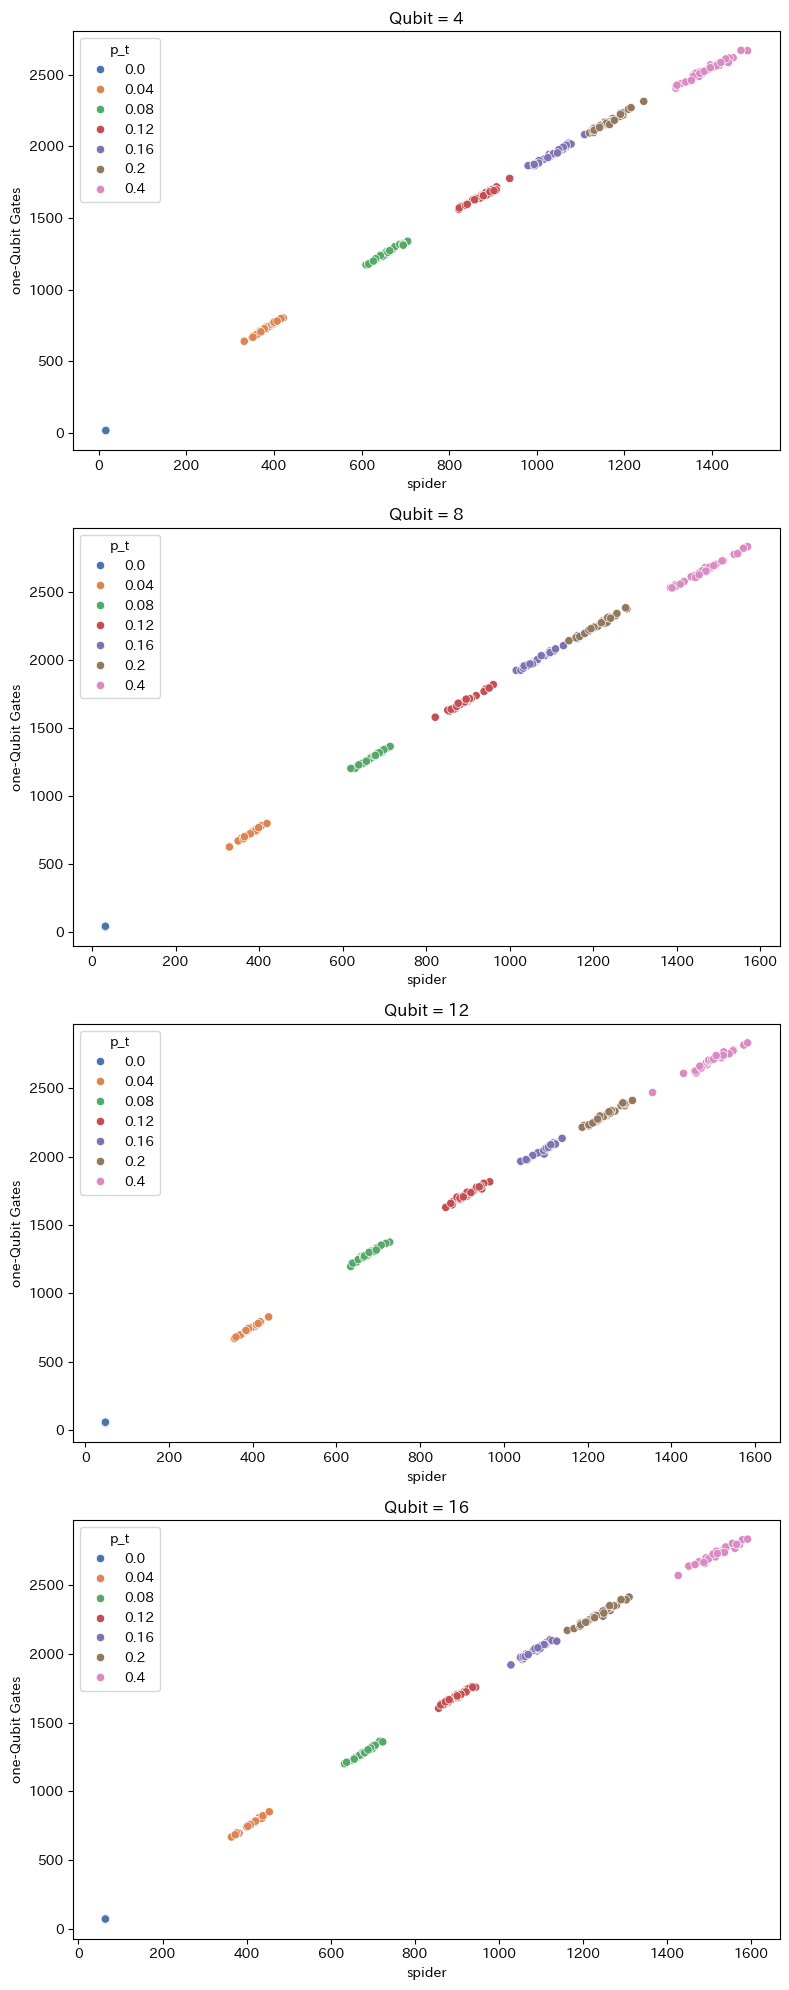

Qubit = 4, p_t = 0: 0.323847312295788
Qubit = 4, p_t = 0.04: 0.9944565911338598
Qubit = 4, p_t = 0.08: 0.9935583060394481
Qubit = 4, p_t = 0.12: 0.9893648010858095
Qubit = 4, p_t = 0.16: 0.9922932090953017
Qubit = 4, p_t = 0.2: 0.9860795094131029
Qubit = 4, p_t = 0.4: 0.9877693758916847
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9937309085495876
Qubit = 8, p_t = 0.08: 0.9950080576797027
Qubit = 8, p_t = 0.12: 0.9918001329770751
Qubit = 8, p_t = 0.16: 0.9934892996470461
Qubit = 8, p_t = 0.2: 0.9917183683743589
Qubit = 8, p_t = 0.4: 0.9952808858660998
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9958900755059603
Qubit = 12, p_t = 0.08: 0.9899369111349949
Qubit = 12, p_t = 0.12: 0.9782425665970812
Qubit = 12, p_t = 0.16: 0.9831420638891861
Qubit = 12, p_t = 0.2: 0.9877236737391346
Qubit = 12, p_t = 0.4: 0.9866605837765698
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.9957131957244378
Qubit = 16, p_t = 0.08: 0.9906637340596912
Qubit = 16, p_t = 0.12: 0.985594426971322
Qubi

In [80]:
#横軸 スパイダー　縦軸1量子ゲート数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #1量子ゲート数取得
            one_qubit_gates = row['one-qubit_gates']
            #次数取得
            spider = row['spider count']
            
            x.append(spider)
            y.append(one_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'one_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='one_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('one-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'one_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'one_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/spider_one.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'one_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'one_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(840, 4)
Qubit = 4: 0.9416440861176427
Qubit = 8: -0.5180253051483166
Qubit = 12: -0.8781498834398767
Qubit = 16: -0.7809721440155579


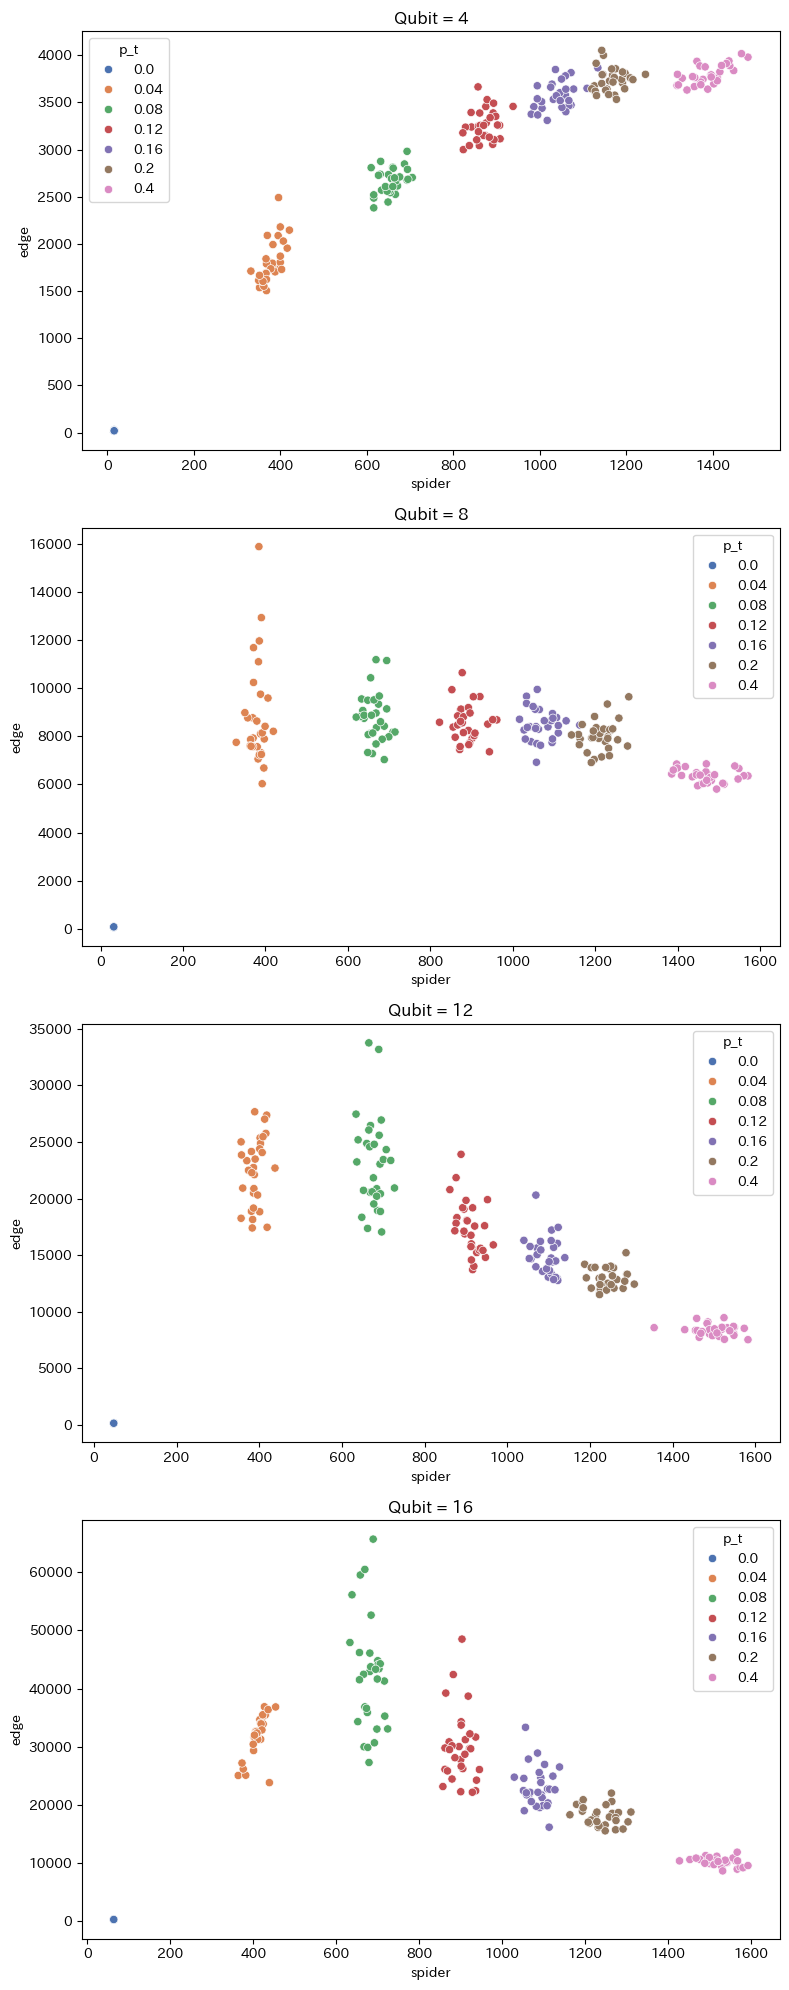

Qubit = 4, p_t = 0: 0.4345779050723525
Qubit = 4, p_t = 0.04: 0.6353967147424918
Qubit = 4, p_t = 0.08: 0.37895931876750455
Qubit = 4, p_t = 0.12: 0.259454291785522
Qubit = 4, p_t = 0.16: 0.45803530151334587
Qubit = 4, p_t = 0.2: 0.09583677846436117
Qubit = 4, p_t = 0.4: 0.6548436835286887
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.03688578376128431
Qubit = 8, p_t = 0.08: -0.09439139504834475
Qubit = 8, p_t = 0.12: -0.10969070084137904
Qubit = 8, p_t = 0.16: -0.07397494082675
Qubit = 8, p_t = 0.2: 0.26457237119012084
Qubit = 8, p_t = 0.4: -0.23305467976165437
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.2569507817126633
Qubit = 12, p_t = 0.08: -0.1190398433656031
Qubit = 12, p_t = 0.12: -0.5175680668563224
Qubit = 12, p_t = 0.16: -0.2794524402933426
Qubit = 12, p_t = 0.2: 0.08597375774236302
Qubit = 12, p_t = 0.4: -0.18707914859674107
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.6973154857621475
Qubit = 16, p_t = 0.08: -0.24158716472074976
Qubit = 16, p_t = 0.12: -0.0

In [81]:
#横軸 スパイダー数　縦軸　エッジ数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            spider = row['spider count']
            edge = row['edge count']
            x.append(spider)
            y.append(edge)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'edge': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='edge', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('edge')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'edge']].corr()
    correlation_value = corr.loc['spider', 'edge']
    print(f"Qubit = {q_value}: {correlation_value}")


# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'edge']].corr()
        correlation_value = corr.loc['spider', 'edge']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")